In [1]:
import numpy as np
from scipy import misc, fft as scipy_fft
from matplotlib import pyplot, colors, cm

colors.get_named_colors_mapping().update({
    'lfd:signal': "#f28e2b",
    'lfd:a': "#4e79a7",
    'lfd:b': "#59a14f",
    'lfd:retina': "#e15759",
    'lfd:pupil': "#edc948",
})

def sampling_coordinates(n, s):
    return (np.arange(n) - (n-1)/2) * s/n

In the spatial domain we have:
$ \large \begin{align*}
    n &= \text{number of spatial samples} \\
    s &= \text{size of the spatial sampling window} \\
    \Delta x &= \text{spatial sampling period} \\
\end{align*} $

Where their relationship is given by:
$ \large \begin{align*}
    s = n \, \Delta x \\
\end{align*} $

In the frequency domain we have:
$ \large \begin{align*}
    n &= \text{number of frequency samples (same as for spatial samples)} \\
    \sigma &= \text{size of the frequency sampling window (spatial sampling rate)} \\
    \Delta \xi &= \text{frequency sampling period} \\
\end{align*} $

Where their relationship is given by:
$ \large \begin{align*}
    \sigma = n \, \Delta \xi \\
\end{align*} $

The frequency domain relates to the spatial domain according to:
$ \large \begin{align*}
    \sigma &= 1 / \Delta x \\
    \Delta \xi &= 1 / s \\
\end{align*} $

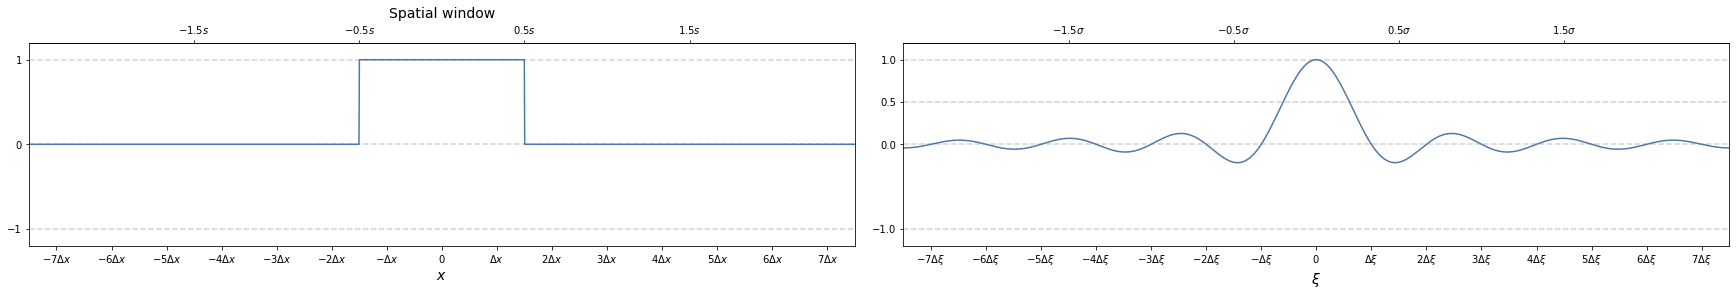

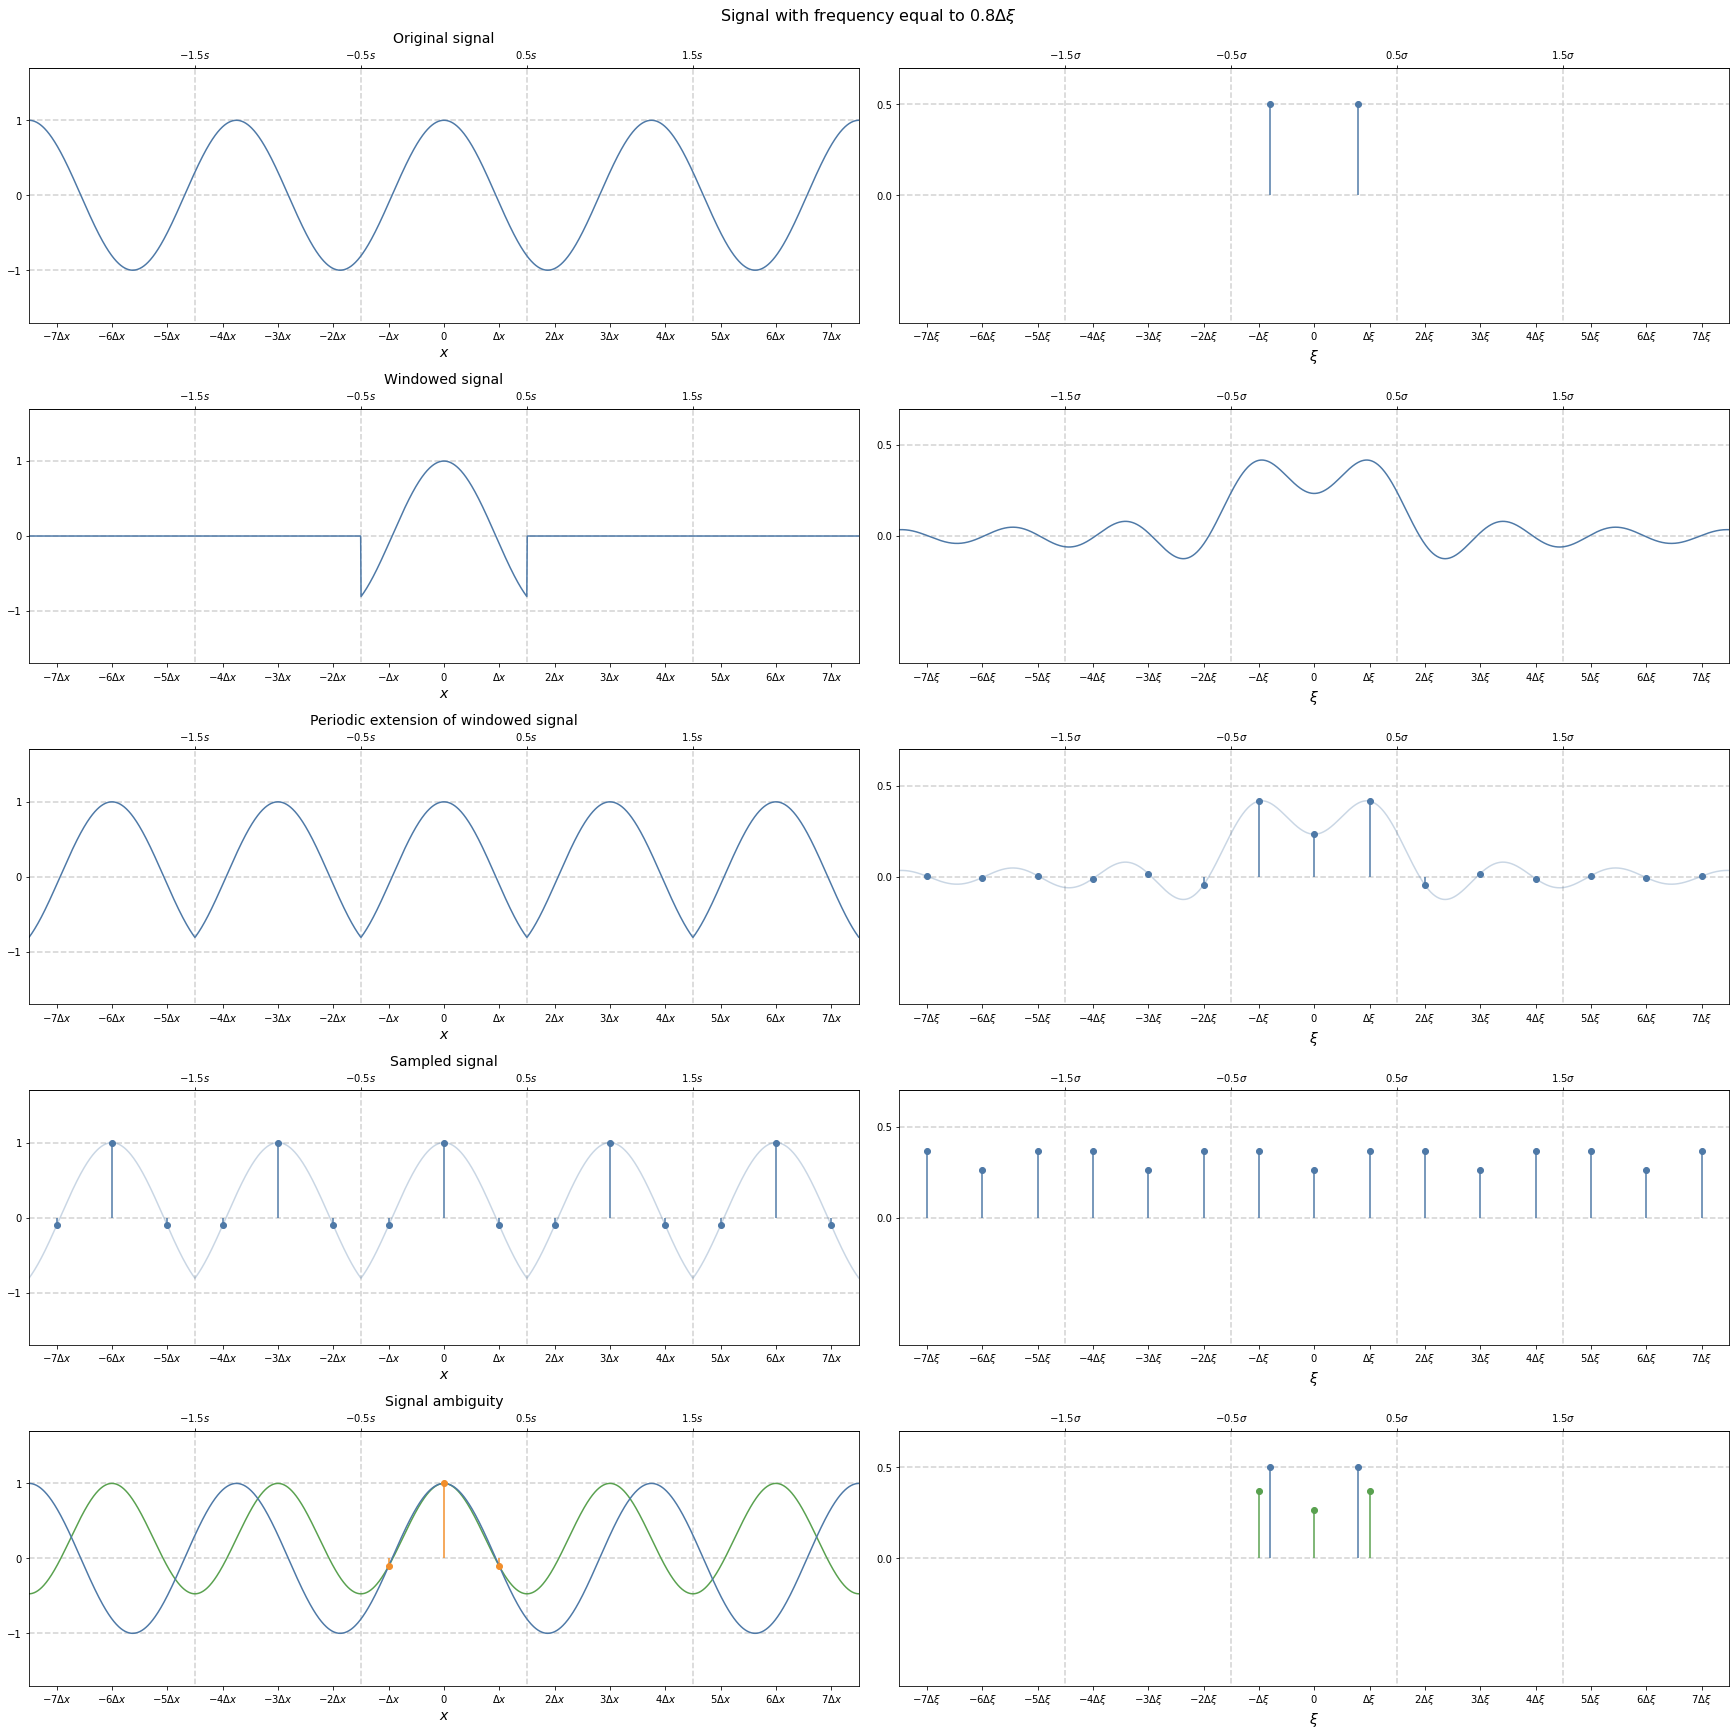

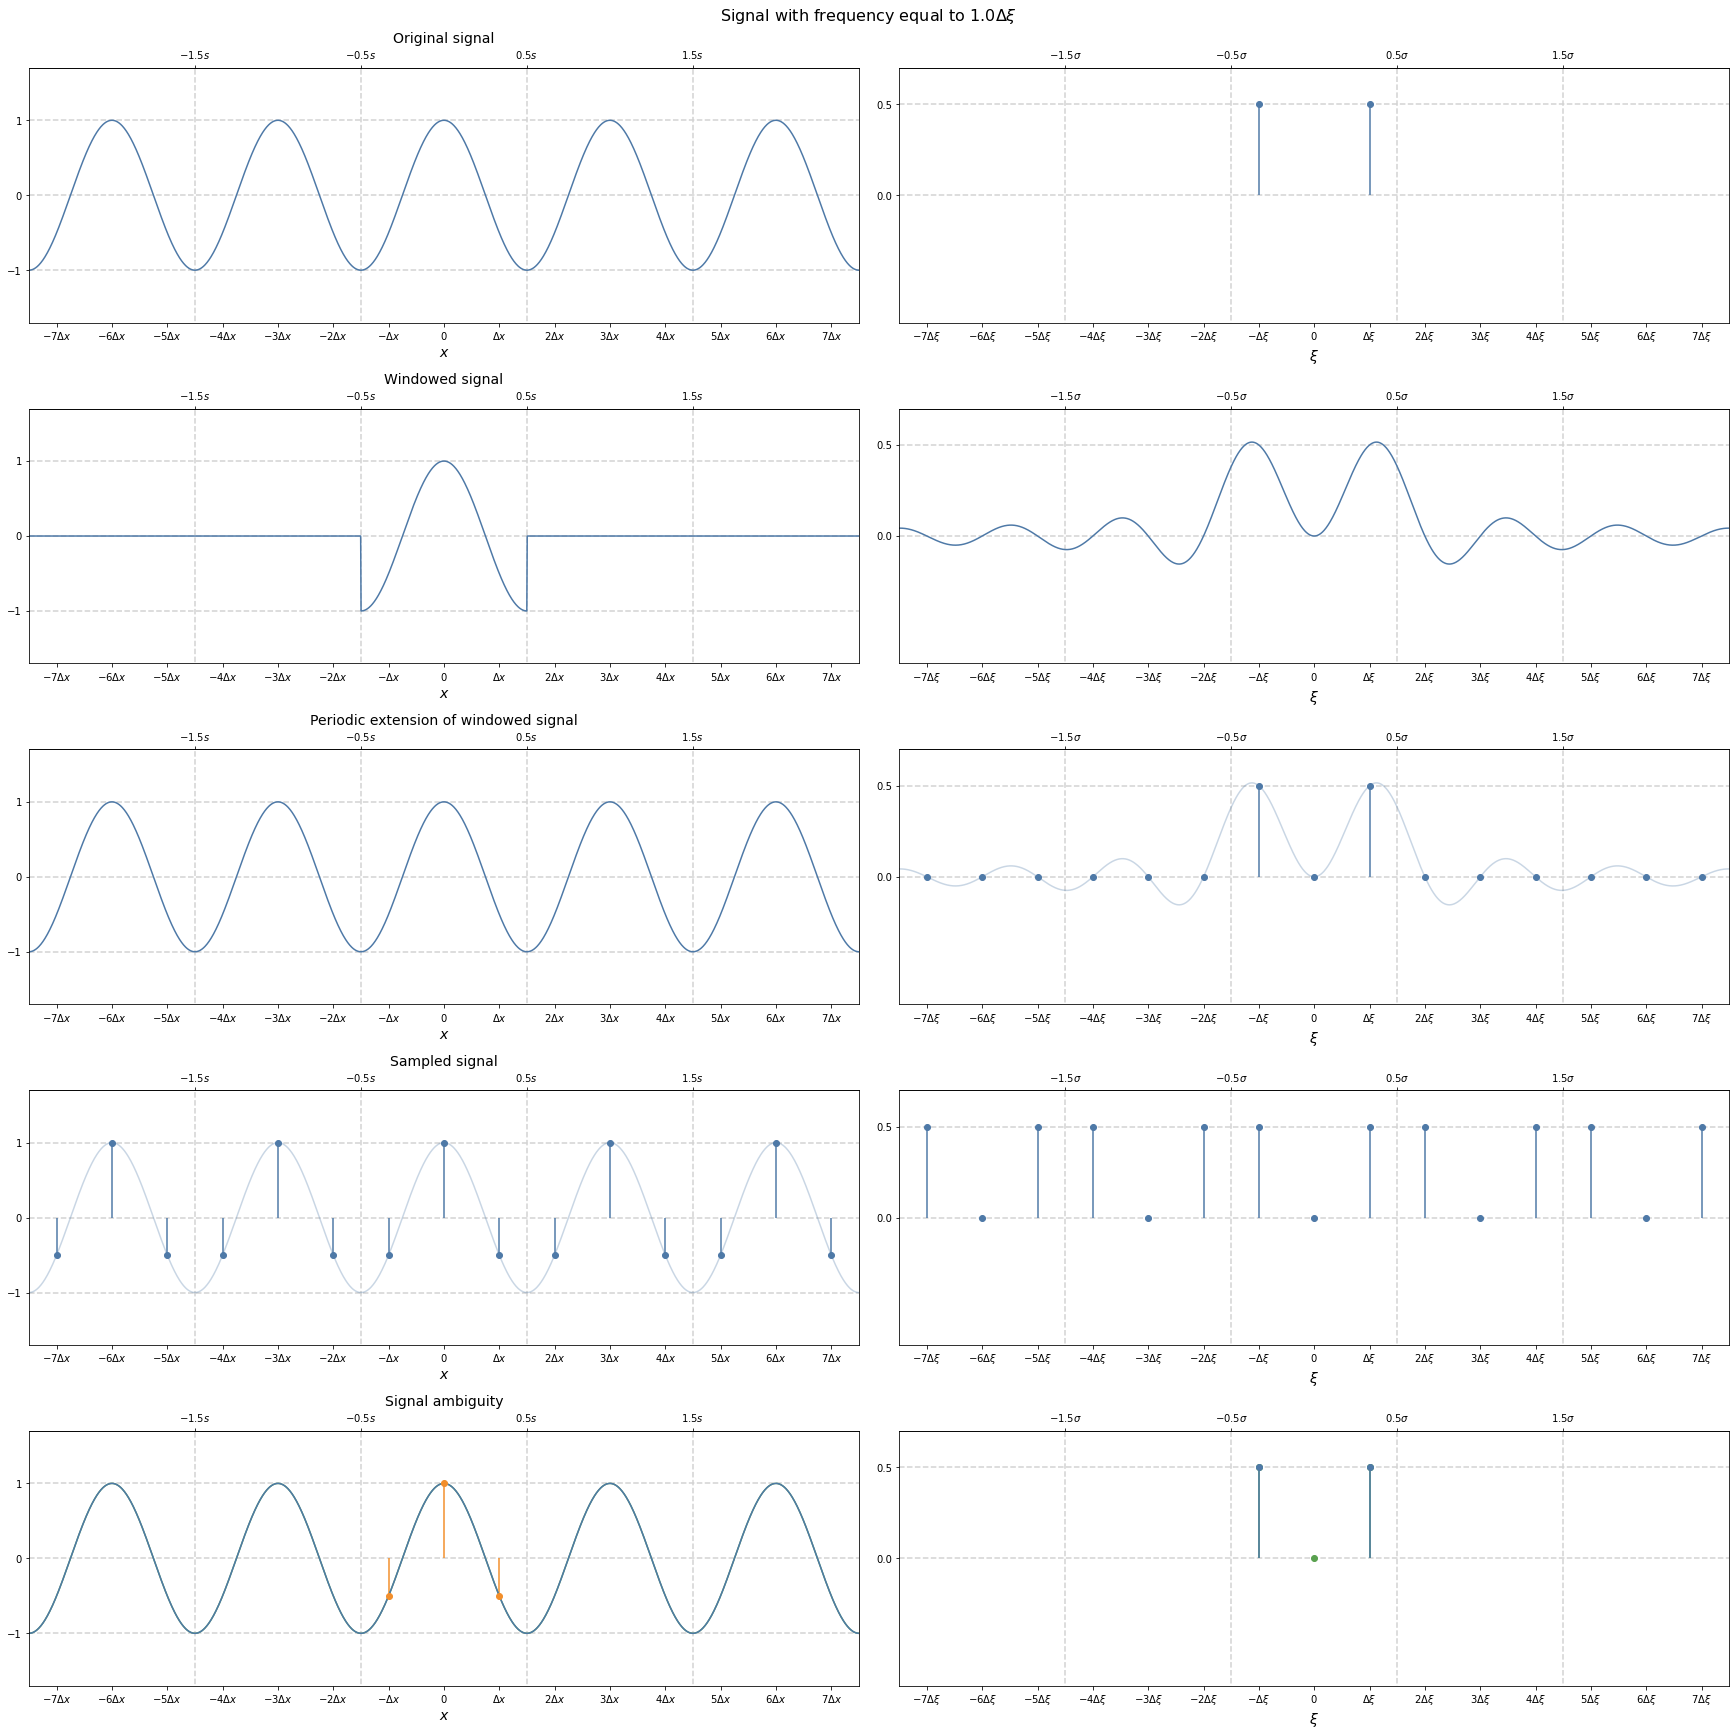

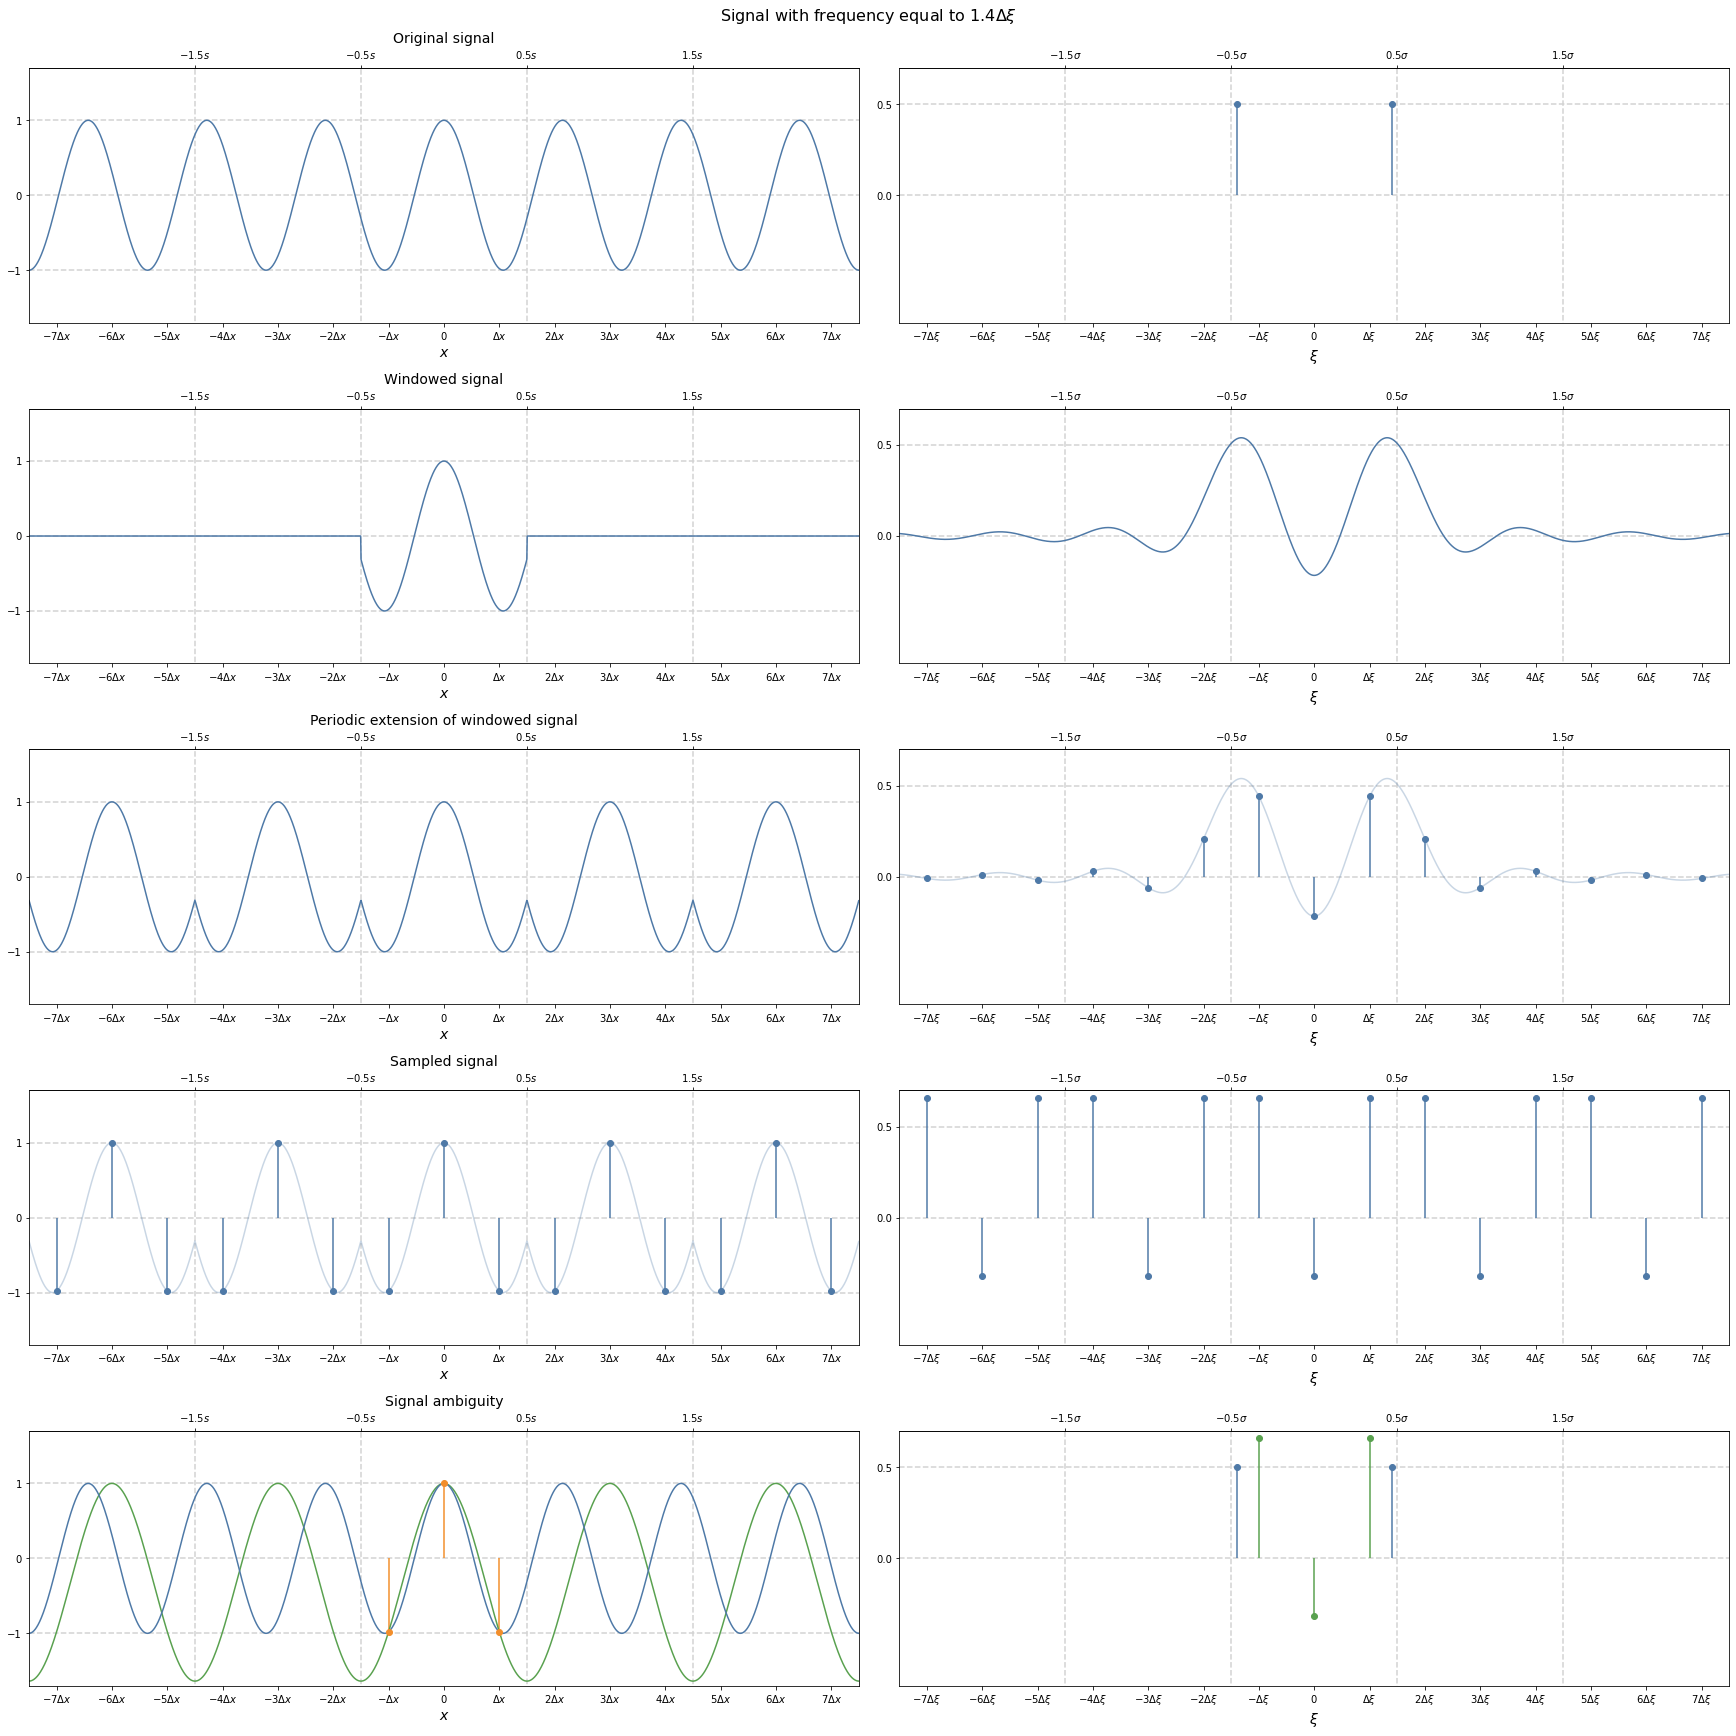

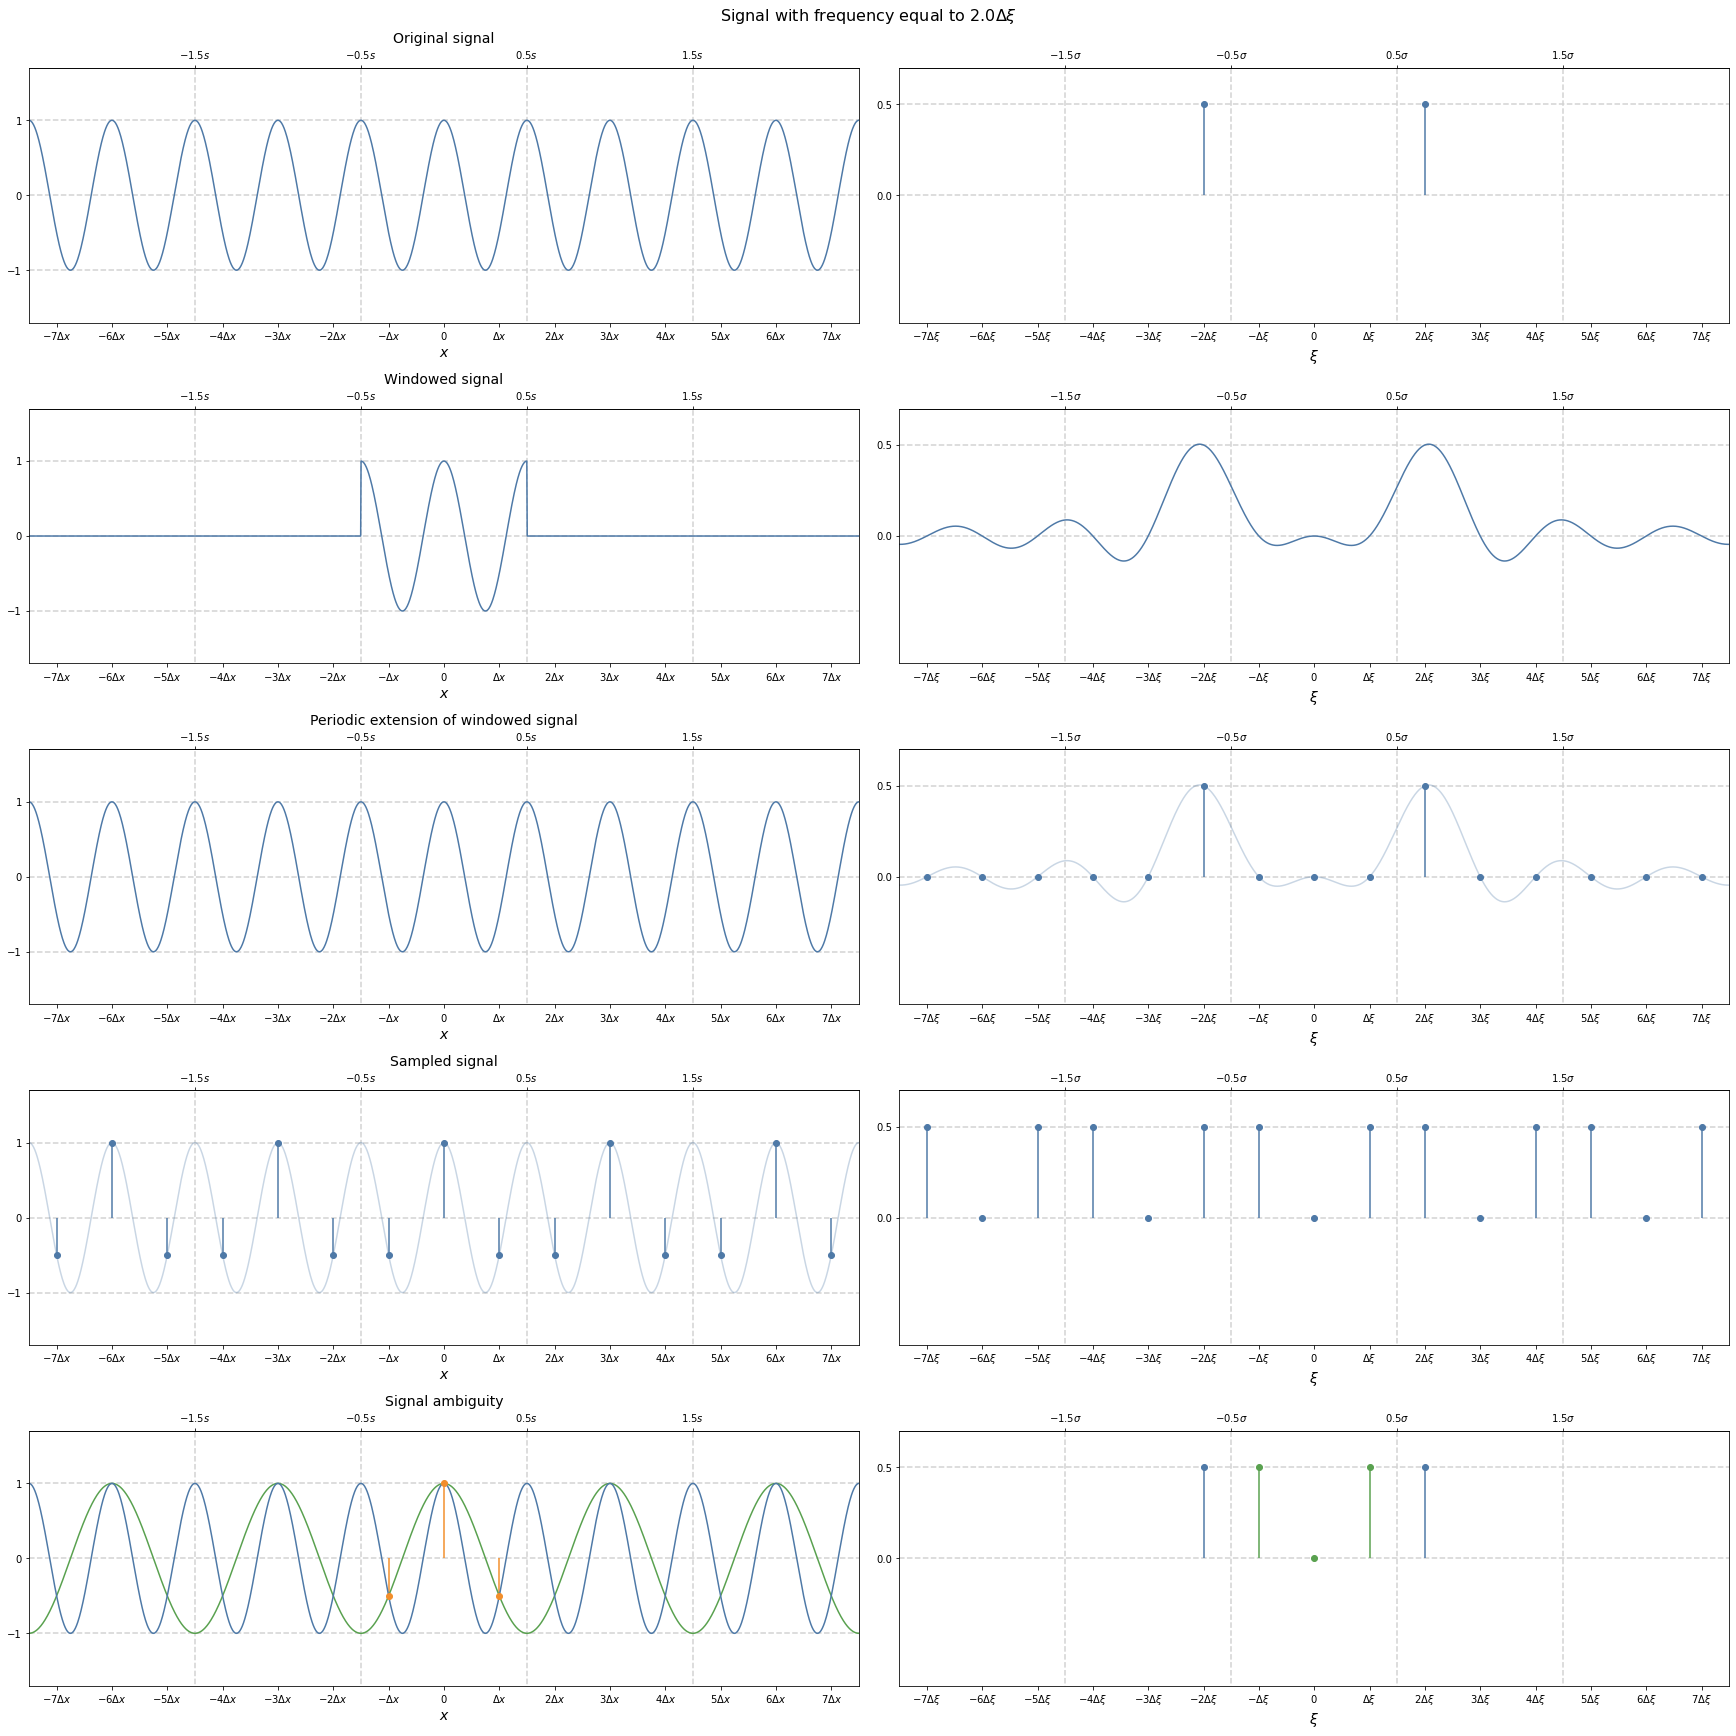

In [2]:
n = 3
s = 1.0

replicas = 5
plot_resolution = 2048

x_plot_size = replicas * s
xi_plot_size = replicas * n/s

x = sampling_coordinates(plot_resolution, x_plot_size)
xi = sampling_coordinates(plot_resolution, xi_plot_size)

comb_s = sampling_coordinates(replicas, x_plot_size)
comb_delta_x = sampling_coordinates(n * replicas, x_plot_size)
comb_sigma = sampling_coordinates(replicas, xi_plot_size)
comb_delta_xi = sampling_coordinates(n * replicas, xi_plot_size)

sampled_x = sampling_coordinates(n, s)
sampled_xi = sampling_coordinates(n, n/s)

s_ticks = comb_s[1:] - s/2
sigma_ticks = comb_sigma[1:] - (n/s)/2
delta_x_ticks = comb_delta_x
delta_xi_ticks = comb_delta_xi

window_indices = np.arange(replicas)[1:] - replicas/2
sample_indices = np.arange(n * replicas) - (n * replicas - 1)/2

s_labels = [fr'${tick}s$' for tick in window_indices]
sigma_labels = [fr'${tick}\sigma$' for tick in window_indices]
delta_x_labels = [fr'${tick}\Delta x$' for tick in sample_indices.astype(np.int8)]
delta_xi_labels = [fr'${tick}\Delta\xi$' for tick in sample_indices.astype(np.int8)]

delta_x_labels[(n * replicas)//2-1:(n * replicas)//2+2] = [r'$-\Delta x$', r'$0$', r'$\Delta x$']
delta_xi_labels[(n * replicas)//2-1:(n * replicas)//2+2] = [r'$-\Delta\xi$', r'$0$', r'$\Delta\xi$']

def spectral_leakage_example(frequency):
    fig, axs = pyplot.subplots(5, 2, constrained_layout=True, figsize=(24, 24))
    fig.suptitle(fr'Signal with frequency equal to ${frequency}\Delta\xi$', fontsize=16)

    for ax in axs[:, 0]:
        ax.set_xlabel(r'$x$', fontsize=14)
        ax.set_xticks(delta_x_ticks)
        ax.set_xticklabels(delta_x_labels)
        top_ax = ax.secondary_xaxis('top')
        top_ax.set_xticks(s_ticks)
        top_ax.set_xticklabels(s_labels)
        ax.set_xlim(-x_plot_size/2, x_plot_size/2)
        ax.set_yticks([-1.0, 0.0, 1.0])
        ax.set_ylim(-1.7, 1.7)
        ax.hlines([-1.0, 0.0, 1.0], -x_plot_size/2, x_plot_size/2, linestyle='dashed', color='lightgrey', zorder=-1)
        ax.vlines(s_ticks, -2, 2, linestyle='dashed', color='lightgrey', zorder=-1)

    for ax in axs[:, 1]:
        ax.set_xlabel(r'$\xi$', fontsize=14)
        ax.set_xticks(delta_xi_ticks)
        ax.set_xticklabels(delta_xi_labels)
        top_ax = ax.secondary_xaxis('top')
        top_ax.set_xticks(sigma_ticks)
        top_ax.set_xticklabels(sigma_labels)
        ax.set_xlim(-xi_plot_size/2, xi_plot_size/2)
        ax.set_yticks([-1.0, 0.0, 0.5, 1.0])
        ax.set_ylim(-0.7, 0.7)
        ax.hlines([-1.0, 0.0, 0.5, 1.0], -xi_plot_size/2, xi_plot_size/2, linestyle='dashed', color='lightgrey', zorder=-1)
        ax.vlines(sigma_ticks, -2, 2, linestyle='dashed', color='lightgrey', zorder=-1)

    spectrum = np.real(scipy_fft.fftshift(scipy_fft.fft(scipy_fft.ifftshift(np.cos(2.0 * np.pi * frequency * sampled_x))))/n)
    
    axs[0, 0].set_title('Original signal', fontsize=14)
    axs[0, 0].plot(x, np.cos(2.0 * np.pi * frequency * x), color='lfd:a')
    axs[1, 0].set_title('Windowed signal', fontsize=14)
    axs[1, 0].plot(x, np.cos(2.0 * np.pi * frequency * x) * (np.abs(x) < 0.5), color='lfd:a')
    axs[2, 0].set_title('Periodic extension of windowed signal', fontsize=14)
    axs[2, 0].plot(x, np.cos(2.0 * np.pi * frequency * (np.mod(x + s/2, s) - s/2)), color='lfd:a')
    axs[3, 0].set_title('Sampled signal', fontsize=14)
    axs[3, 0].plot(x, np.cos(2.0 * np.pi * frequency * (np.mod(x + s/2, s) - s/2)), alpha=0.3, color='lfd:a')
    axs[3, 0].stem(comb_delta_x, np.cos(2.0 * np.pi * frequency * (np.mod(comb_delta_x + s/2, s) - s/2)), linefmt='lfd:a', basefmt='none')[0].set_color('lfd:a')
    axs[4, 0].set_title('Signal ambiguity', fontsize=14)
    axs[4, 0].plot(x, np.cos(2.0 * np.pi * sampled_xi[-1] * x) * (spectrum[0] + spectrum[-1]) + spectrum[n//2], color='lfd:b')
    axs[4, 0].plot(x, np.cos(2.0 * np.pi * frequency * x), color='lfd:a')
    axs[4, 0].stem(sampled_x, np.cos(2.0 * np.pi * frequency * sampled_x), linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')

    axs[0, 1].stem([frequency, -frequency], [0.5]*2, linefmt='lfd:a', basefmt='none')[0].set_color('lfd:a')
    axs[1, 1].plot(xi, 0.5 * (np.sinc(xi - frequency) + np.sinc(xi + frequency)), color='lfd:a')
    axs[2, 1].plot(xi, 0.5 * (np.sinc(xi - frequency) + np.sinc(xi + frequency)), alpha=0.3, color='lfd:a')
    axs[2, 1].stem(comb_delta_xi, 0.5 * (np.sinc(comb_delta_xi - frequency) + np.sinc(comb_delta_xi + frequency)), linefmt='lfd:a', basefmt='none')[0].set_color('lfd:a')
    axs[3, 1].stem(comb_delta_xi, np.tile(spectrum, replicas), linefmt='lfd:a', basefmt='none')[0].set_color('lfd:a')
    axs[4, 1].stem(sampled_xi, spectrum, linefmt='lfd:b', basefmt='none')[0].set_color('lfd:b')
    axs[4, 1].stem([frequency, -frequency], [0.5]*2, linefmt='lfd:a', basefmt='none')[0].set_color('lfd:a')

fig, axs = pyplot.subplots(1, 2, constrained_layout=True, figsize=(24, 4))

for ax in axs.flat:
    ax.set_xticks(comb_s)
    ax.set_yticks([-1.0, 0.0, 1.0])
    ax.set_xlim(-4.0, 4.0)
    ax.set_ylim(-1.2, 1.2)

axs[0].set_title('Spatial window', fontsize=14)
axs[0].set_xlabel(r'$x$', fontsize=14)
axs[0].set_xticks(delta_x_ticks)
axs[0].set_xticklabels(delta_x_labels)
top_ax = axs[0].secondary_xaxis('top')
top_ax.set_xticks(s_ticks)
top_ax.set_xticklabels(s_labels)
axs[0].set_xlim(-x_plot_size/2, x_plot_size/2)
axs[0].set_yticks([-1.0, 0.0, 1.0])
axs[0].set_ylim(-1.2, 1.2)
axs[0].hlines([-1.0, 0.0, 1.0], -x_plot_size/2, x_plot_size/2, linestyle='dashed', color='lightgrey', zorder=-1)

axs[1].set_xlabel(r'$\xi$', fontsize=14)
axs[1].set_xticks(delta_xi_ticks)
axs[1].set_xticklabels(delta_xi_labels)
top_ax = axs[1].secondary_xaxis('top')
top_ax.set_xticks(sigma_ticks)
top_ax.set_xticklabels(sigma_labels)
axs[1].set_xlim(-xi_plot_size/2, xi_plot_size/2)
axs[1].set_yticks([-1.0, 0.0, 0.5, 1.0])
axs[1].set_ylim(-1.2, 1.2)
axs[1].hlines([-1.0, 0.0, 0.5, 1.0], -xi_plot_size/2, xi_plot_size/2, linestyle='dashed', color='lightgrey', zorder=-1)

axs[0].plot(x, np.abs(x) < 0.5, color='lfd:a')
axs[1].plot(xi, np.sinc(xi), color='lfd:a')

spectral_leakage_example(0.8/s)
spectral_leakage_example(1.0/s)
spectral_leakage_example(1.4/s)
spectral_leakage_example(2.0/s)

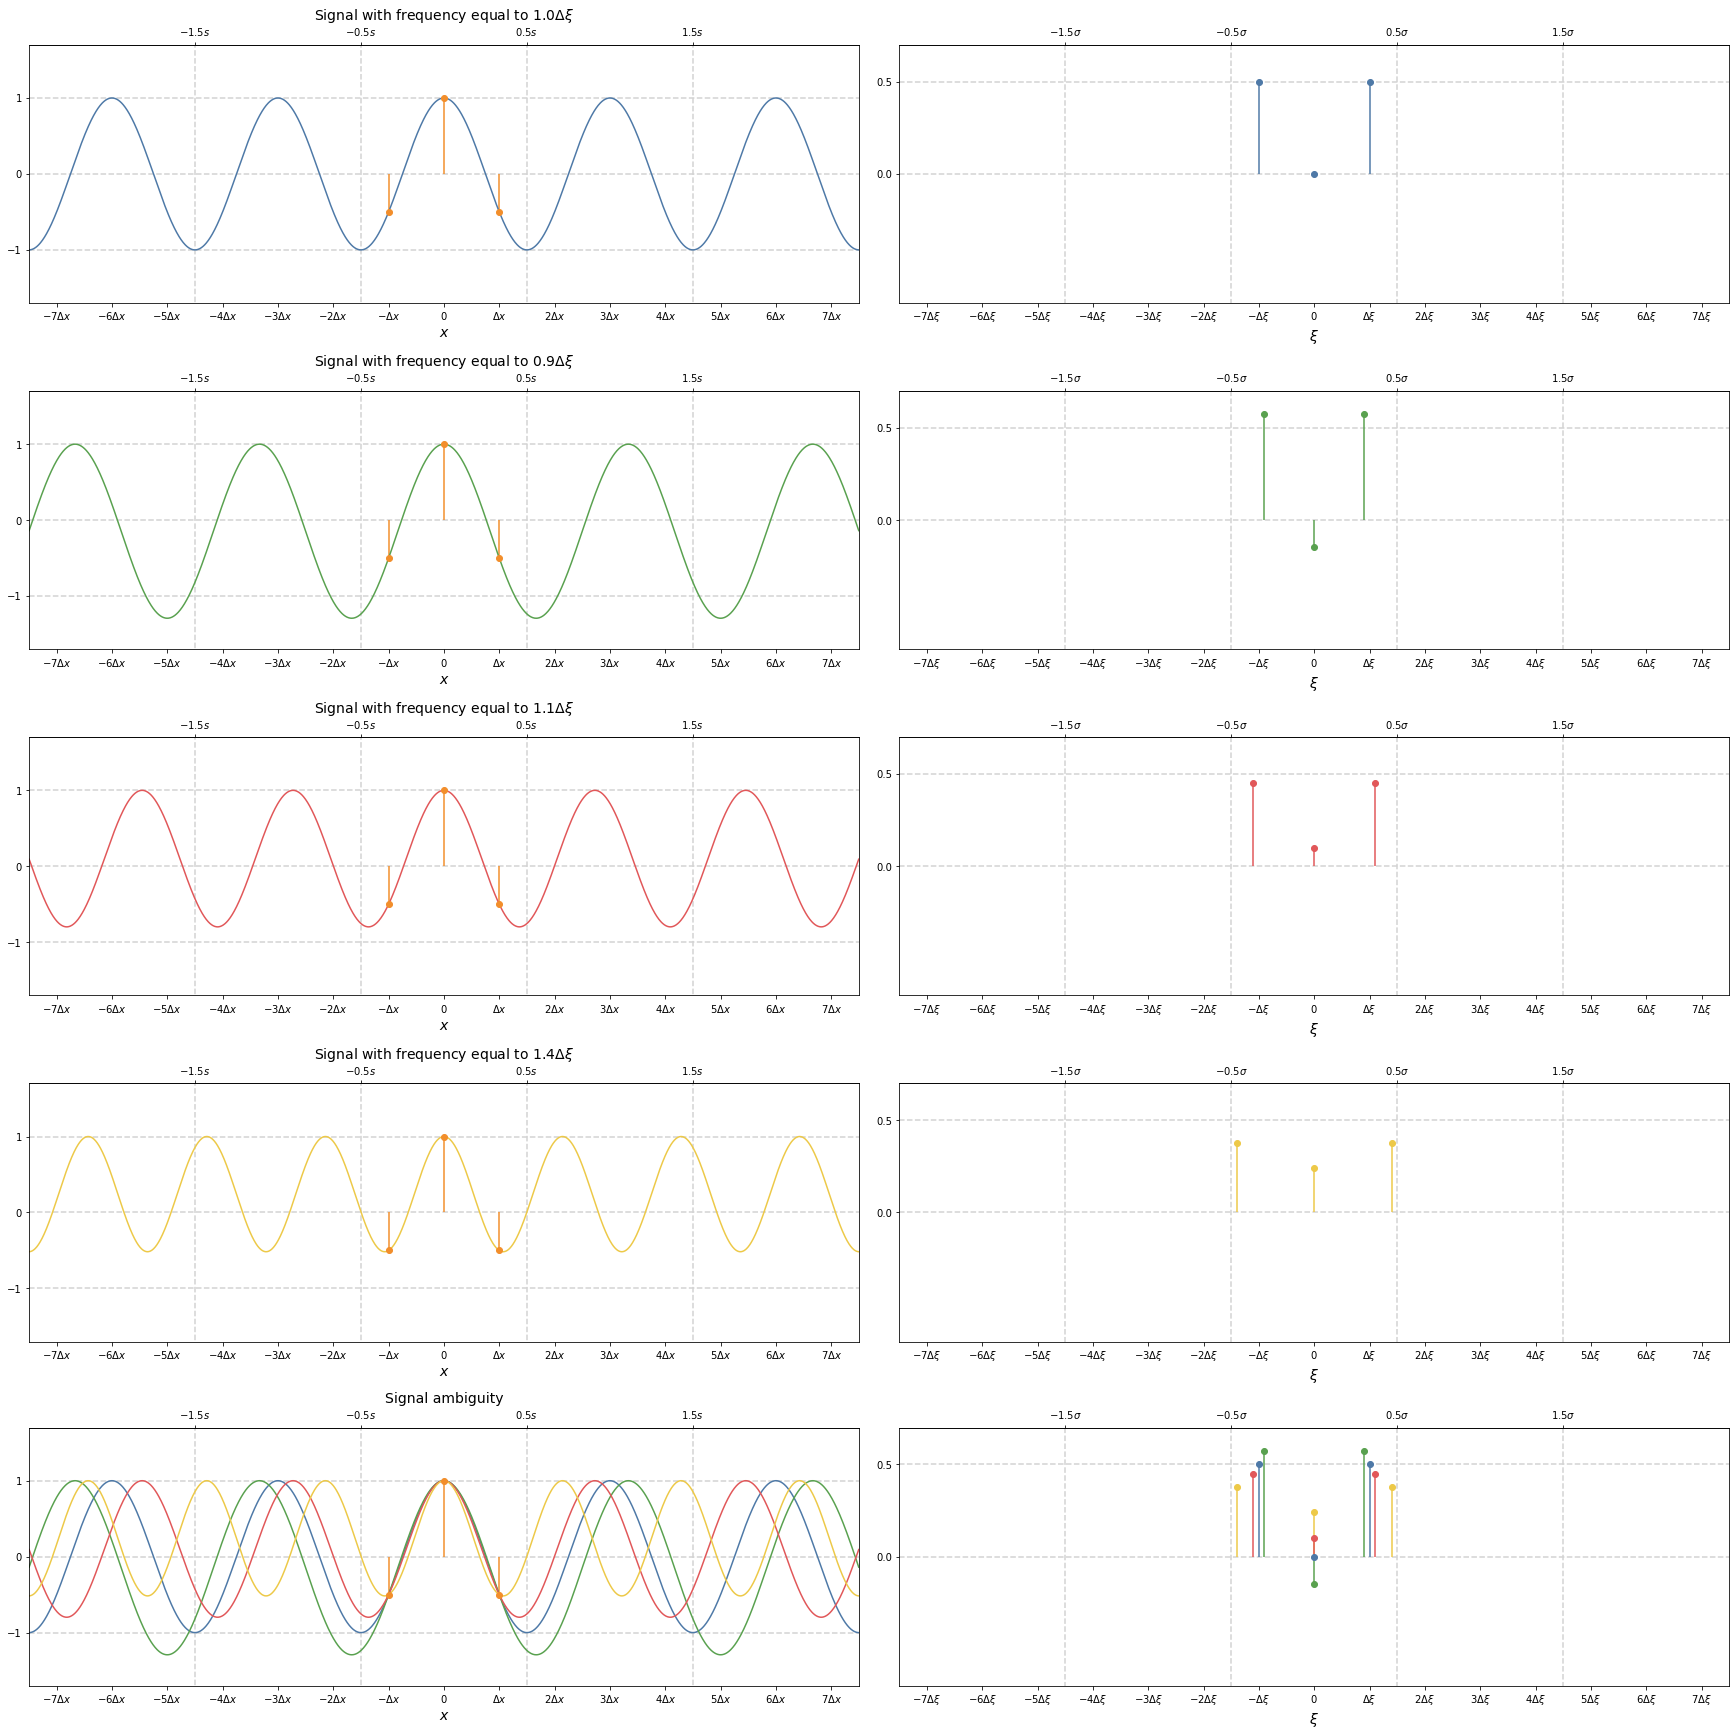

In [3]:
n = 3
s = 1.0

replicas = 5
plot_resolution = 2048

x_plot_size = replicas * s
xi_plot_size = replicas * n/s

x = sampling_coordinates(plot_resolution, x_plot_size)
xi = sampling_coordinates(plot_resolution, xi_plot_size)

comb_s = sampling_coordinates(replicas, x_plot_size)
comb_delta_x = sampling_coordinates(n * replicas, x_plot_size)
comb_sigma = sampling_coordinates(replicas, xi_plot_size)
comb_delta_xi = sampling_coordinates(n * replicas, xi_plot_size)

sampled_x = sampling_coordinates(n, s)
sampled_xi = sampling_coordinates(n, n/s)

s_ticks = comb_s[1:] - s/2
sigma_ticks = comb_sigma[1:] - (n/s)/2
delta_x_ticks = comb_delta_x
delta_xi_ticks = comb_delta_xi

window_indices = np.arange(replicas)[1:] - replicas/2
sample_indices = np.arange(n * replicas) - (n * replicas - 1)/2

s_labels = [fr'${tick}s$' for tick in window_indices]
sigma_labels = [fr'${tick}\sigma$' for tick in window_indices]
delta_x_labels = [fr'${tick}\Delta x$' for tick in sample_indices.astype(np.int8)]
delta_xi_labels = [fr'${tick}\Delta\xi$' for tick in sample_indices.astype(np.int8)]

delta_x_labels[(n * replicas)//2-1:(n * replicas)//2+2] = [r'$-\Delta x$', r'$0$', r'$\Delta x$']
delta_xi_labels[(n * replicas)//2-1:(n * replicas)//2+2] = [r'$-\Delta\xi$', r'$0$', r'$\Delta\xi$']

xi_0 = 1.0/s
xi_1 = 0.9/s
xi_2 = 1.1/s
xi_3 = 1.4/s

spectrum_1 = np.real(scipy_fft.fftshift(scipy_fft.fft(scipy_fft.ifftshift(np.cos(2.0 * np.pi * xi_1 * sampled_x))))/n)
spectrum_2 = np.real(scipy_fft.fftshift(scipy_fft.fft(scipy_fft.ifftshift(np.cos(2.0 * np.pi * xi_2 * sampled_x))))/n)
spectrum_3 = np.real(scipy_fft.fftshift(scipy_fft.fft(scipy_fft.ifftshift(np.cos(2.0 * np.pi * xi_3 * sampled_x))))/n)

fig, axs = pyplot.subplots(5, 2, constrained_layout=True, figsize=(24, 24))

for ax in axs[:, 0]:
    ax.set_xlabel(r'$x$', fontsize=14)
    ax.set_xticks(delta_x_ticks)
    ax.set_xticklabels(delta_x_labels)
    top_ax = ax.secondary_xaxis('top')
    top_ax.set_xticks(s_ticks)
    top_ax.set_xticklabels(s_labels)
    ax.set_xlim(-x_plot_size/2, x_plot_size/2)
    ax.set_yticks([-1.0, 0.0, 1.0])
    ax.set_ylim(-1.7, 1.7)
    ax.hlines([-1.0, 0.0, 1.0], -x_plot_size/2, x_plot_size/2, linestyle='dashed', color='lightgrey', zorder=-1)
    ax.vlines(s_ticks, -2, 2, linestyle='dashed', color='lightgrey', zorder=-1)

for ax in axs[:, 1]:
    ax.set_xlabel(r'$\xi$', fontsize=14)
    ax.set_xticks(delta_xi_ticks)
    ax.set_xticklabels(delta_xi_labels)
    top_ax = ax.secondary_xaxis('top')
    top_ax.set_xticks(sigma_ticks)
    top_ax.set_xticklabels(sigma_labels)
    ax.set_xlim(-xi_plot_size/2, xi_plot_size/2)
    ax.set_yticks([0.0, 0.5])
    ax.set_ylim(-0.7, 0.7)
    ax.hlines([-1.0, 0.0, 0.5, 1.0], -xi_plot_size/2, xi_plot_size/2, linestyle='dashed', color='lightgrey', zorder=-1)
    ax.vlines(sigma_ticks, -2, 2, linestyle='dashed', color='lightgrey', zorder=-1)

axs[0, 0].set_title(fr'Signal with frequency equal to ${xi_0}\Delta\xi$', fontsize=14)
axs[0, 0].plot(x, np.cos(2.0 * np.pi * xi_0 * x), color='lfd:a')
axs[0, 0].stem(sampled_x, np.cos(2.0 * np.pi * xi_0 * sampled_x), linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')
axs[0, 1].stem([-xi_0, 0.0, xi_0], [0.5, 0.0, 0.5], linefmt='lfd:a', basefmt='none')[0].set_color('lfd:a')

axs[1, 0].set_title(fr'Signal with frequency equal to ${xi_1}\Delta\xi$', fontsize=14)
axs[1, 0].plot(x, (np.cos(2.0 * np.pi * xi_1 * x)  - spectrum_1[1]) / (2*spectrum_1[0]), color='lfd:b')
axs[1, 0].stem(sampled_x, np.cos(2.0 * np.pi * xi_0 * sampled_x), linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')
axs[1, 1].stem([-xi_1, 0.0, xi_1], [0.5, -spectrum_1[1], 0.5]/(2*spectrum_1[0]), linefmt='lfd:b', basefmt='none')[0].set_color('lfd:b')

axs[2, 0].set_title(fr'Signal with frequency equal to ${xi_2}\Delta\xi$', fontsize=14)
axs[2, 0].plot(x, (np.cos(2.0 * np.pi * xi_2 * x)  - spectrum_2[1]) / (2*spectrum_2[0]), color='lfd:retina')
axs[2, 0].stem(sampled_x, np.cos(2.0 * np.pi * xi_0 * sampled_x), linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')
axs[2, 1].stem([-xi_2, 0.0, xi_2], [0.5, -spectrum_2[1], 0.5]/(2*spectrum_2[0]), linefmt='lfd:retina', basefmt='none')[0].set_color('lfd:retina')

axs[3, 0].set_title(fr'Signal with frequency equal to ${xi_3}\Delta\xi$', fontsize=14)
axs[3, 0].plot(x, (np.cos(2.0 * np.pi * xi_3 * x)  - spectrum_3[1]) / (2*spectrum_3[0]), color='lfd:pupil')
axs[3, 0].stem(sampled_x, np.cos(2.0 * np.pi * xi_0 * sampled_x), linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')
axs[3, 1].stem([-xi_3, 0.0, xi_3], [0.5, -spectrum_3[1], 0.5]/(2*spectrum_3[0]), linefmt='lfd:pupil', basefmt='none')[0].set_color('lfd:pupil')

axs[4, 0].set_title('Signal ambiguity', fontsize=14)
axs[4, 0].plot(x, np.cos(2.0 * np.pi * xi_0 * x), color='lfd:a')
axs[4, 0].plot(x, (np.cos(2.0 * np.pi * xi_1 * x)  - spectrum_1[1]) / (2*spectrum_1[0]), color='lfd:b')
axs[4, 0].plot(x, (np.cos(2.0 * np.pi * xi_2 * x)  - spectrum_2[1]) / (2*spectrum_2[0]), color='lfd:retina')
axs[4, 0].plot(x, (np.cos(2.0 * np.pi * xi_3 * x)  - spectrum_3[1]) / (2*spectrum_3[0]), color='lfd:pupil')
axs[4, 0].stem(sampled_x, np.cos(2.0 * np.pi * xi_0 * sampled_x), linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')

axs[4, 1].stem([-xi_3, 0.0, xi_3], [0.5, -spectrum_3[1], 0.5]/(2*spectrum_3[0]), linefmt='lfd:pupil', basefmt='none')[0].set_color('lfd:pupil')
axs[4, 1].stem([-xi_2, 0.0, xi_2], [0.5, -spectrum_2[1], 0.5]/(2*spectrum_2[0]), linefmt='lfd:retina', basefmt='none')[0].set_color('lfd:retina')
axs[4, 1].stem([-xi_1, 0.0, xi_1], [0.5, -spectrum_1[1], 0.5]/(2*spectrum_1[0]), linefmt='lfd:b', basefmt='none')[0].set_color('lfd:b')
axs[4, 1].stem([-xi_0, 0.0, xi_0], [0.5, 0.0, 0.5], linefmt='lfd:a', basefmt='none')[0].set_color('lfd:a')

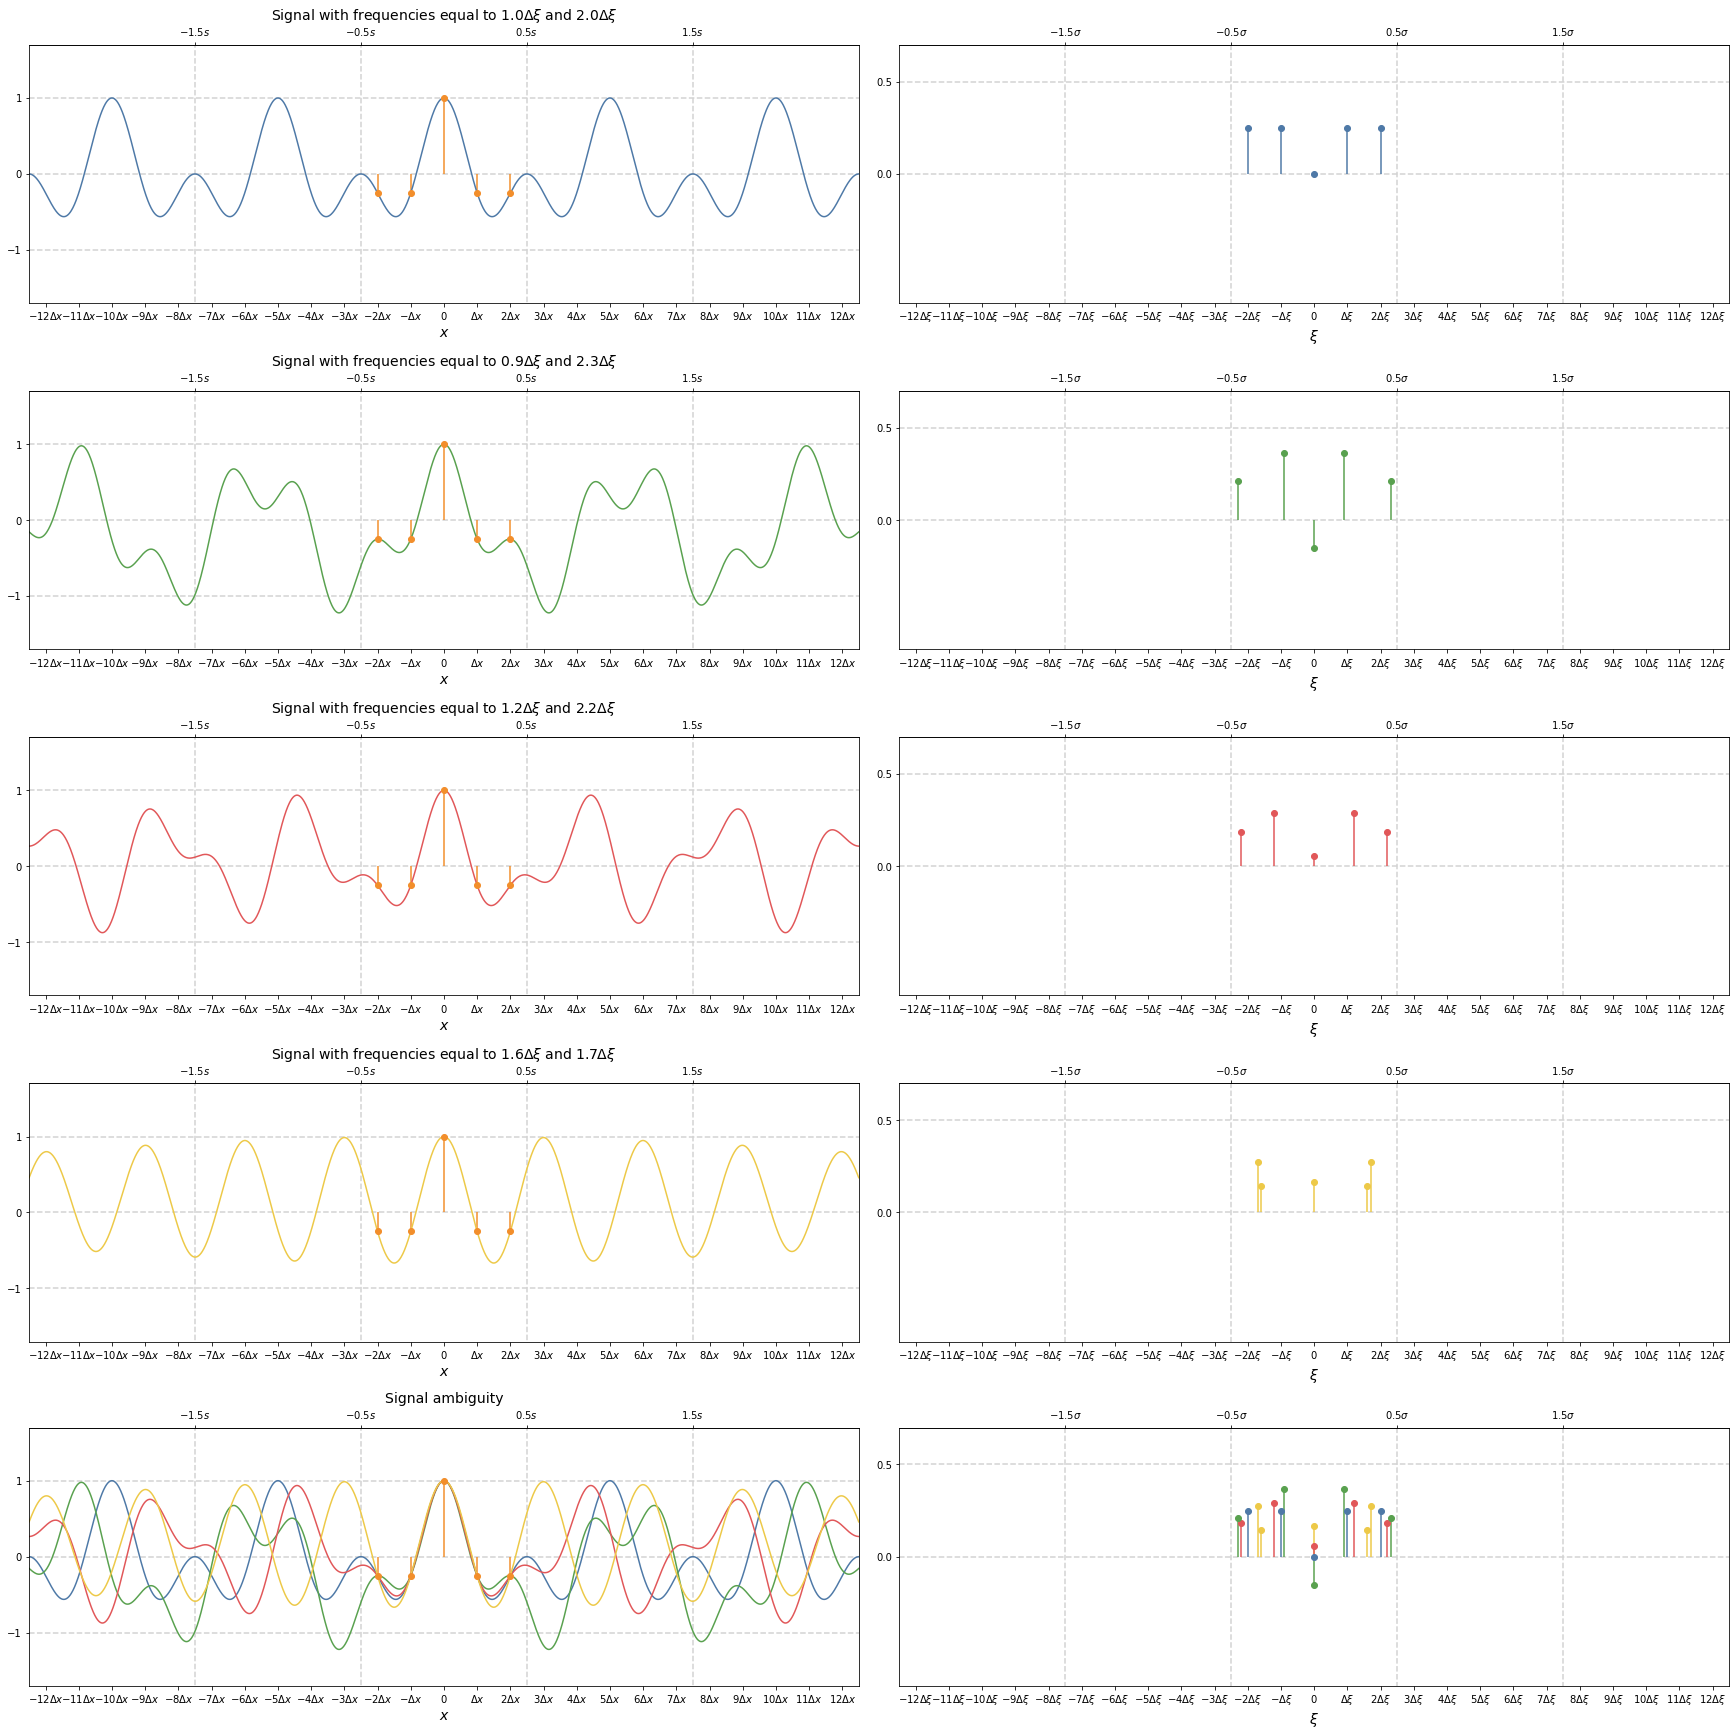

In [4]:
n = 5
s = 1.0

replicas = 5
plot_resolution = 2048

x_plot_size = replicas * s
xi_plot_size = replicas * n/s

x = sampling_coordinates(plot_resolution, x_plot_size)
xi = sampling_coordinates(plot_resolution, xi_plot_size)

comb_s = sampling_coordinates(replicas, x_plot_size)
comb_delta_x = sampling_coordinates(n * replicas, x_plot_size)
comb_sigma = sampling_coordinates(replicas, xi_plot_size)
comb_delta_xi = sampling_coordinates(n * replicas, xi_plot_size)

sampled_x = sampling_coordinates(n, s)
sampled_xi = sampling_coordinates(n, n/s)

s_ticks = comb_s[1:] - s/2
sigma_ticks = comb_sigma[1:] - (n/s)/2
delta_x_ticks = comb_delta_x
delta_xi_ticks = comb_delta_xi

window_indices = np.arange(replicas)[1:] - replicas/2
sample_indices = np.arange(n * replicas) - (n * replicas - 1)/2

s_labels = [fr'${tick}s$' for tick in window_indices]
sigma_labels = [fr'${tick}\sigma$' for tick in window_indices]
delta_x_labels = [fr'${tick}\Delta x$' for tick in sample_indices.astype(np.int8)]
delta_xi_labels = [fr'${tick}\Delta\xi$' for tick in sample_indices.astype(np.int8)]

delta_x_labels[(n * replicas)//2-1:(n * replicas)//2+2] = [r'$-\Delta x$', r'$0$', r'$\Delta x$']
delta_xi_labels[(n * replicas)//2-1:(n * replicas)//2+2] = [r'$-\Delta\xi$', r'$0$', r'$\Delta\xi$']

xi_0_a = 1.0/s
xi_0_b = 2.0/s

xi_1_a = 0.9/s
xi_1_b = 2.3/s

xi_2_a = 1.2/s
xi_2_b = 2.2/s

xi_3_a = 1.6/s
xi_3_b = 1.7/s

spectrum_1_a = np.real(scipy_fft.fftshift(scipy_fft.fft(scipy_fft.ifftshift(np.cos(2.0 * np.pi * xi_1_a * sampled_x))))/n)
spectrum_1_b = np.real(scipy_fft.fftshift(scipy_fft.fft(scipy_fft.ifftshift(np.cos(2.0 * np.pi * xi_1_b * sampled_x))))/n)
amplitude_1_a = 0.5 * (spectrum_1_b[0] * 0.5 - spectrum_1_b[1] * 0.5) / (spectrum_1_b[0] * spectrum_1_a[1] - spectrum_1_b[1] * spectrum_1_a[0])
amplitude_1_b = 0.5 * (spectrum_1_a[0] * 0.5 - spectrum_1_a[1] * 0.5) / (spectrum_1_a[0] * spectrum_1_b[1] - spectrum_1_a[1] * spectrum_1_b[0])
shift_1 = -(amplitude_1_a * spectrum_1_a[2] + amplitude_1_b * spectrum_1_b[2])

spectrum_2_a = np.real(scipy_fft.fftshift(scipy_fft.fft(scipy_fft.ifftshift(np.cos(2.0 * np.pi * xi_2_a * sampled_x))))/n)
spectrum_2_b = np.real(scipy_fft.fftshift(scipy_fft.fft(scipy_fft.ifftshift(np.cos(2.0 * np.pi * xi_2_b * sampled_x))))/n)
amplitude_2_a = 0.5 * (spectrum_2_b[0] * 0.5 - spectrum_2_b[1] * 0.5) / (spectrum_2_b[0] * spectrum_2_a[1] - spectrum_2_b[1] * spectrum_2_a[0])
amplitude_2_b = 0.5 * (spectrum_2_a[0] * 0.5 - spectrum_2_a[1] * 0.5) / (spectrum_2_a[0] * spectrum_2_b[1] - spectrum_2_a[1] * spectrum_2_b[0])
shift_2 = -(amplitude_2_a * spectrum_2_a[2] + amplitude_2_b * spectrum_2_b[2])

spectrum_3_a = np.real(scipy_fft.fftshift(scipy_fft.fft(scipy_fft.ifftshift(np.cos(2.0 * np.pi * xi_3_a * sampled_x))))/n)
spectrum_3_b = np.real(scipy_fft.fftshift(scipy_fft.fft(scipy_fft.ifftshift(np.cos(2.0 * np.pi * xi_3_b * sampled_x))))/n)
amplitude_3_a = 0.5 * (spectrum_3_b[0] * 0.5 - spectrum_3_b[1] * 0.5) / (spectrum_3_b[0] * spectrum_3_a[1] - spectrum_3_b[1] * spectrum_3_a[0])
amplitude_3_b = 0.5 * (spectrum_3_a[0] * 0.5 - spectrum_3_a[1] * 0.5) / (spectrum_3_a[0] * spectrum_3_b[1] - spectrum_3_a[1] * spectrum_3_b[0])
shift_3 = -(amplitude_3_a * spectrum_3_a[2] + amplitude_3_b * spectrum_3_b[2])

fig, axs = pyplot.subplots(5, 2, constrained_layout=True, figsize=(24, 24))

for ax in axs[:, 0]:
    ax.set_xlabel(r'$x$', fontsize=14)
    ax.set_xticks(delta_x_ticks)
    ax.set_xticklabels(delta_x_labels)
    top_ax = ax.secondary_xaxis('top')
    top_ax.set_xticks(s_ticks)
    top_ax.set_xticklabels(s_labels)
    ax.set_xlim(-x_plot_size/2, x_plot_size/2)
    ax.set_yticks([-1.0, 0.0, 1.0])
    ax.set_ylim(-1.7, 1.7)
    ax.hlines([-1.0, 0.0, 1.0], -x_plot_size/2, x_plot_size/2, linestyle='dashed', color='lightgrey', zorder=-1)
    ax.vlines(s_ticks, -2, 2, linestyle='dashed', color='lightgrey', zorder=-1)

for ax in axs[:, 1]:
    ax.set_xlabel(r'$\xi$', fontsize=14)
    ax.set_xticks(delta_xi_ticks)
    ax.set_xticklabels(delta_xi_labels)
    top_ax = ax.secondary_xaxis('top')
    top_ax.set_xticks(sigma_ticks)
    top_ax.set_xticklabels(sigma_labels)
    ax.set_xlim(-xi_plot_size/2, xi_plot_size/2)
    ax.set_yticks([0.0, 0.5])
    ax.set_ylim(-0.7, 0.7)
    ax.hlines([-1.0, 0.0, 0.5, 1.0], -xi_plot_size/2, xi_plot_size/2, linestyle='dashed', color='lightgrey', zorder=-1)
    ax.vlines(sigma_ticks, -2, 2, linestyle='dashed', color='lightgrey', zorder=-1)

axs[0, 0].set_title(fr'Signal with frequencies equal to ${xi_0_a}\Delta\xi$ and ${xi_0_b}\Delta\xi$', fontsize=14)
axs[0, 0].plot(x, 0.5 * np.cos(2.0 * np.pi * xi_0_a * x) + 0.5 * np.cos(2.0 * np.pi * xi_0_b * x), color='lfd:a')
axs[0, 0].stem(sampled_x, 0.5 * np.cos(2.0 * np.pi * xi_0_a * sampled_x) + 0.5 * np.cos(2.0 * np.pi * xi_0_b * sampled_x), linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')
axs[0, 1].stem([-xi_0_b, -xi_0_a, 0.0, xi_0_a, xi_0_b], [0.25, 0.25, 0.0, 0.25, 0.25], linefmt='lfd:a', basefmt='none')[0].set_color('lfd:a')

axs[1, 0].set_title(fr'Signal with frequencies equal to ${xi_1_a}\Delta\xi$ and ${xi_1_b}\Delta\xi$', fontsize=14)
axs[1, 0].plot(x, amplitude_1_a * np.cos(2.0 * np.pi * xi_1_a * x) + amplitude_1_b * np.cos(2.0 * np.pi * xi_1_b * x) + shift_1, color='lfd:b')
axs[1, 0].stem(sampled_x, 0.5 * np.cos(2.0 * np.pi * xi_0_a * sampled_x) + 0.5 * np.cos(2.0 * np.pi * xi_0_b * sampled_x), linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')
axs[1, 1].stem([-xi_1_b, -xi_1_a, 0.0, xi_1_a, xi_1_b], [amplitude_1_b/2, amplitude_1_a/2, shift_1, amplitude_1_a/2, amplitude_1_b/2], linefmt='lfd:b', basefmt='none')[0].set_color('lfd:b')

axs[2, 0].set_title(fr'Signal with frequencies equal to ${xi_2_a}\Delta\xi$ and ${xi_2_b}\Delta\xi$', fontsize=14)
axs[2, 0].plot(x, amplitude_2_a * np.cos(2.0 * np.pi * xi_2_a * x) + amplitude_2_b * np.cos(2.0 * np.pi * xi_2_b * x) + shift_2, color='lfd:retina')
axs[2, 0].stem(sampled_x, 0.5 * np.cos(2.0 * np.pi * xi_0_a * sampled_x) + 0.5 * np.cos(2.0 * np.pi * xi_0_b * sampled_x), linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')
axs[2, 1].stem([-xi_2_b, -xi_2_a, 0.0, xi_2_a, xi_2_b], [amplitude_2_b/2, amplitude_2_a/2, shift_2, amplitude_2_a/2, amplitude_2_b/2], linefmt='lfd:retina', basefmt='none')[0].set_color('lfd:retina')

axs[3, 0].set_title(fr'Signal with frequencies equal to ${xi_3_a}\Delta\xi$ and ${xi_3_b}\Delta\xi$', fontsize=14)
axs[3, 0].plot(x, amplitude_3_a * np.cos(2.0 * np.pi * xi_3_a * x) + amplitude_3_b * np.cos(2.0 * np.pi * xi_3_b * x) + shift_3, color='lfd:pupil')
axs[3, 0].stem(sampled_x, 0.5 * np.cos(2.0 * np.pi * xi_0_a * sampled_x) + 0.5 * np.cos(2.0 * np.pi * xi_0_b * sampled_x), linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')
axs[3, 1].stem([-xi_3_b, -xi_3_a, 0.0, xi_3_a, xi_3_b], [amplitude_3_b/2, amplitude_3_a/2, shift_3, amplitude_3_a/2, amplitude_3_b/2], linefmt='lfd:pupil', basefmt='none')[0].set_color('lfd:pupil')

axs[4, 0].set_title('Signal ambiguity', fontsize=14)
axs[4, 0].plot(x, 0.5 * np.cos(2.0 * np.pi * xi_0_a * x) + 0.5 * np.cos(2.0 * np.pi * xi_0_b * x), color='lfd:a')
axs[4, 0].plot(x, amplitude_1_a * np.cos(2.0 * np.pi * xi_1_a * x) + amplitude_1_b * np.cos(2.0 * np.pi * xi_1_b * x) + shift_1, color='lfd:b')
axs[4, 0].plot(x, amplitude_2_a * np.cos(2.0 * np.pi * xi_2_a * x) + amplitude_2_b * np.cos(2.0 * np.pi * xi_2_b * x) + shift_2, color='lfd:retina')
axs[4, 0].plot(x, amplitude_3_a * np.cos(2.0 * np.pi * xi_3_a * x) + amplitude_3_b * np.cos(2.0 * np.pi * xi_3_b * x) + shift_3, color='lfd:pupil')
axs[4, 0].stem(sampled_x, 0.5 * np.cos(2.0 * np.pi * xi_0_a * sampled_x) + 0.5 * np.cos(2.0 * np.pi * xi_0_b * sampled_x), linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')

axs[4, 1].stem([-xi_3_b, -xi_3_a, 0.0, xi_3_a, xi_3_b], [amplitude_3_b/2, amplitude_3_a/2, shift_3, amplitude_3_a/2, amplitude_3_b/2], linefmt='lfd:pupil', basefmt='none')[0].set_color('lfd:pupil')
axs[4, 1].stem([-xi_2_b, -xi_2_a, 0.0, xi_2_a, xi_2_b], [amplitude_2_b/2, amplitude_2_a/2, shift_2, amplitude_2_a/2, amplitude_2_b/2], linefmt='lfd:retina', basefmt='none')[0].set_color('lfd:retina')
axs[4, 1].stem([-xi_1_b, -xi_1_a, 0.0, xi_1_a, xi_1_b], [amplitude_1_b/2, amplitude_1_a/2, shift_1, amplitude_1_a/2, amplitude_1_b/2], linefmt='lfd:b', basefmt='none')[0].set_color('lfd:b')
axs[4, 1].stem([-xi_0_b, -xi_0_a, 0.0, xi_0_a, xi_0_b], [0.25, 0.25, 0.0, 0.25, 0.25], linefmt='lfd:a', basefmt='none')[0].set_color('lfd:a')

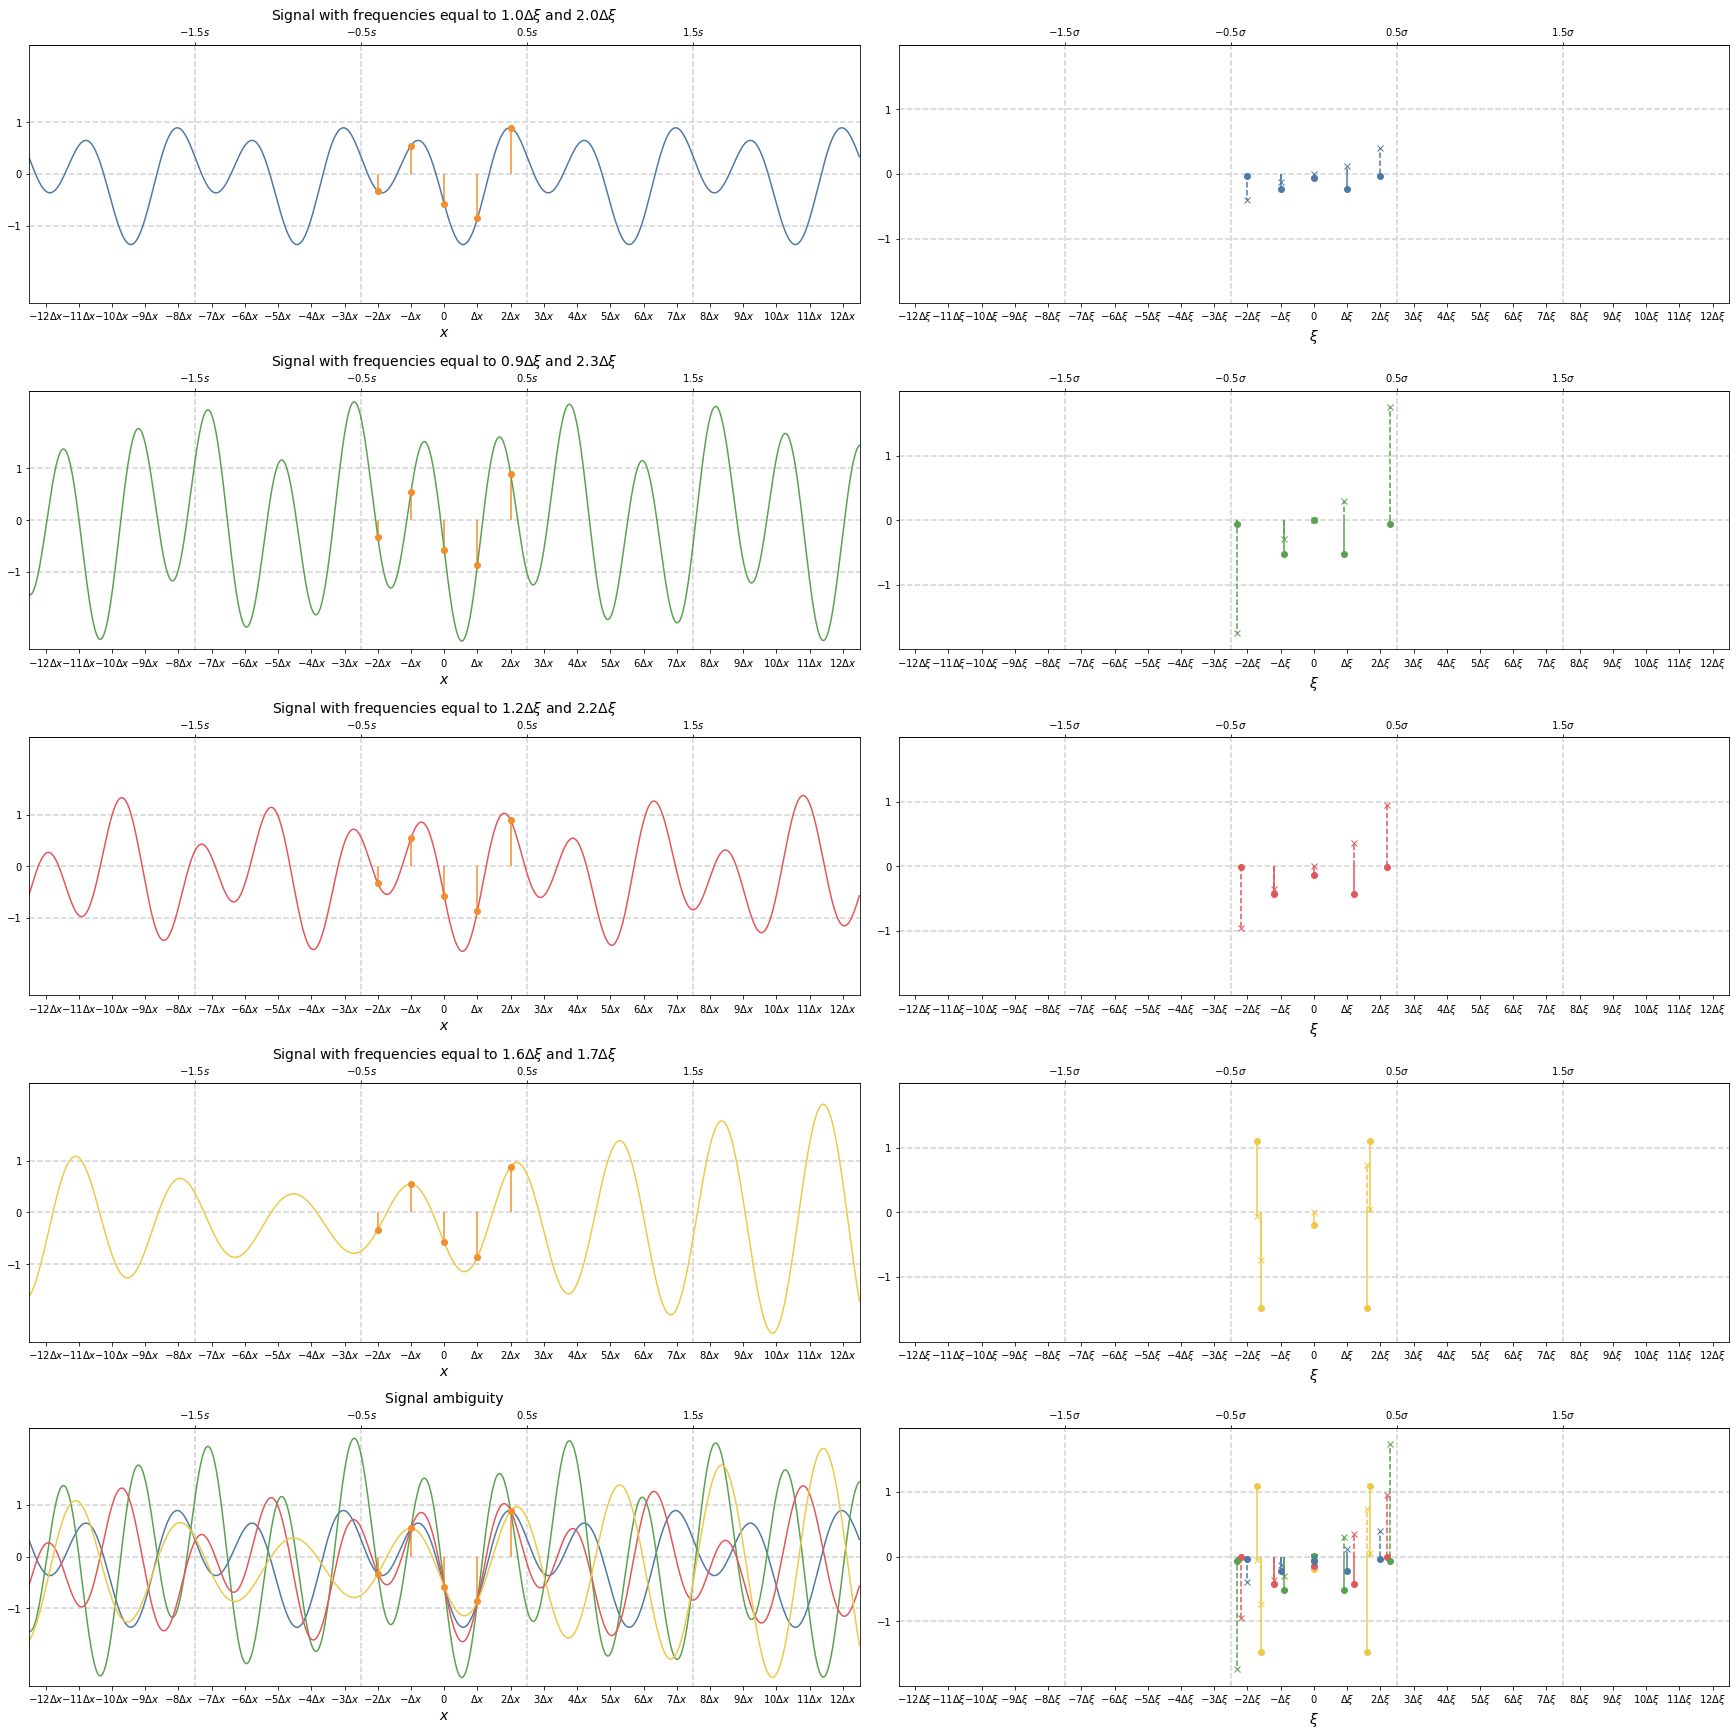

In [5]:
def unleak_spectrum(xi_a, xi_b, xi_1, xi_2, z_1, z_2, sigma):
    comb_sigma = sampling_coordinates(111, 111 * sigma)

    A1plus = np.sum(np.sinc(xi_1 - xi_a + comb_sigma)) + np.sum(np.sinc(xi_1 + xi_a + comb_sigma))
    A2plus = np.sum(np.sinc(xi_2 - xi_a + comb_sigma)) + np.sum(np.sinc(xi_2 + xi_a + comb_sigma))
    B1plus = np.sum(np.sinc(xi_1 - xi_b + comb_sigma)) + np.sum(np.sinc(xi_1 + xi_b + comb_sigma))
    B2plus = np.sum(np.sinc(xi_2 - xi_b + comb_sigma)) + np.sum(np.sinc(xi_2 + xi_b + comb_sigma))
    A1minus = np.sum(np.sinc(xi_1 - xi_a + comb_sigma)) - np.sum(np.sinc(xi_1 + xi_a + comb_sigma))
    A2minus = np.sum(np.sinc(xi_2 - xi_a + comb_sigma)) - np.sum(np.sinc(xi_2 + xi_a + comb_sigma))
    B1minus = np.sum(np.sinc(xi_1 - xi_b + comb_sigma)) - np.sum(np.sinc(xi_1 + xi_b + comb_sigma))
    B2minus = np.sum(np.sinc(xi_2 - xi_b + comb_sigma)) - np.sum(np.sinc(xi_2 + xi_b + comb_sigma))

    Ra = (B1plus * np.real(z_2) - np.real(z_1) * B2plus) / (B1plus * A2plus - A1plus * B2plus)
    Rb = (A1plus * np.real(z_2) - np.real(z_1) * A2plus) / (A1plus * B2plus - B1plus * A2plus)
    Ia = (B1minus * np.imag(z_2) - np.imag(z_1) * B2minus) / (B1minus * A2minus - A1minus * B2minus)
    Ib = (A1minus * np.imag(z_2) - np.imag(z_1) * A2minus) / (A1minus * B2minus - B1minus * A2minus)

    z_a = Ra + 1j * Ia
    z_b = Rb + 1j * Ib

    return z_a, z_b

n = 5
s = 1.0

replicas = 5
plot_resolution = 2048

x_plot_size = replicas * s
xi_plot_size = replicas * n/s

x = sampling_coordinates(plot_resolution, x_plot_size)
xi = sampling_coordinates(plot_resolution, xi_plot_size)

comb_s = sampling_coordinates(replicas, x_plot_size)
comb_delta_x = sampling_coordinates(n * replicas, x_plot_size)
comb_sigma = sampling_coordinates(replicas, xi_plot_size)
comb_delta_xi = sampling_coordinates(n * replicas, xi_plot_size)

sampled_x = sampling_coordinates(n, s)
sampled_xi = sampling_coordinates(n, n/s)

s_ticks = comb_s[1:] - s/2
sigma_ticks = comb_sigma[1:] - (n/s)/2
delta_x_ticks = comb_delta_x
delta_xi_ticks = comb_delta_xi

window_indices = np.arange(replicas)[1:] - replicas/2
sample_indices = np.arange(n * replicas) - (n * replicas - 1)/2

s_labels = [fr'${tick}s$' for tick in window_indices]
sigma_labels = [fr'${tick}\sigma$' for tick in window_indices]
delta_x_labels = [fr'${tick}\Delta x$' for tick in sample_indices.astype(np.int8)]
delta_xi_labels = [fr'${tick}\Delta\xi$' for tick in sample_indices.astype(np.int8)]

delta_x_labels[(n * replicas)//2-1:(n * replicas)//2+2] = [r'$-\Delta x$', r'$0$', r'$\Delta x$']
delta_xi_labels[(n * replicas)//2-1:(n * replicas)//2+2] = [r'$-\Delta\xi$', r'$0$', r'$\Delta\xi$']

samples = np.array([-0.33, 0.55, -0.58, -0.86, 0.89])
spectrum_0 = scipy_fft.fftshift(scipy_fft.fft(scipy_fft.ifftshift(samples)))/n
shift_0 = np.real(spectrum_0[-3])

xi_0_a, xi_0_b = sampled_xi[-2], sampled_xi[-1]
xi_1_a, xi_1_b = 0.9/s, 2.3/s
xi_2_a, xi_2_b = 1.2/s, 2.2/s
xi_3_a, xi_3_b = 1.6/s, 1.7/s

z_0_a, z_0_b = 2*spectrum_0[-2], 2*spectrum_0[-1]
z_1_a, z_1_b = unleak_spectrum(xi_1_a, xi_1_b, xi_0_a, xi_0_b, z_0_a, z_0_b, n/s)
z_2_a, z_2_b = unleak_spectrum(xi_2_a, xi_2_b, xi_0_a, xi_0_b, z_0_a, z_0_b, n/s)
z_3_a, z_3_b = unleak_spectrum(xi_3_a, xi_3_b, xi_0_a, xi_0_b, z_0_a, z_0_b, n/s)

shift_1 = shift_0 - np.real(scipy_fft.fft(scipy_fft.ifftshift(np.abs(z_1_a) * np.cos(2.0 * np.pi * xi_1_a * sampled_x + np.angle(z_1_a)) + np.abs(z_1_b) * np.cos(2.0 * np.pi * xi_1_b * sampled_x + np.angle(z_1_b))))[0])/n
shift_2 = shift_0 - np.real(scipy_fft.fft(scipy_fft.ifftshift(np.abs(z_2_a) * np.cos(2.0 * np.pi * xi_2_a * sampled_x + np.angle(z_2_a)) + np.abs(z_2_b) * np.cos(2.0 * np.pi * xi_2_b * sampled_x + np.angle(z_2_b))))[0])/n
shift_3 = shift_0 - np.real(scipy_fft.fft(scipy_fft.ifftshift(np.abs(z_3_a) * np.cos(2.0 * np.pi * xi_3_a * sampled_x + np.angle(z_3_a)) + np.abs(z_3_b) * np.cos(2.0 * np.pi * xi_3_b * sampled_x + np.angle(z_3_b))))[0])/n

fig, axs = pyplot.subplots(5, 2, constrained_layout=True, figsize=(24, 24))

for ax in axs[:, 0]:
    ax.set_xlabel(r'$x$', fontsize=14)
    ax.set_xticks(delta_x_ticks)
    ax.set_xticklabels(delta_x_labels)
    top_ax = ax.secondary_xaxis('top')
    top_ax.set_xticks(s_ticks)
    top_ax.set_xticklabels(s_labels)
    ax.set_xlim(-x_plot_size/2, x_plot_size/2)
    ax.set_yticks([-1.0, 0.0, 1.0])
    ax.set_ylim(-2.5, 2.5)
    ax.hlines([-1.0, 0.0, 1.0], -x_plot_size/2, x_plot_size/2, linestyle='dashed', color='lightgrey', zorder=-1)
    ax.vlines(s_ticks, -3, 3, linestyle='dashed', color='lightgrey', zorder=-1)

for ax in axs[:, 1]:
    ax.set_xlabel(r'$\xi$', fontsize=14)
    ax.set_xticks(delta_xi_ticks)
    ax.set_xticklabels(delta_xi_labels)
    top_ax = ax.secondary_xaxis('top')
    top_ax.set_xticks(sigma_ticks)
    top_ax.set_xticklabels(sigma_labels)
    ax.set_xlim(-xi_plot_size/2, xi_plot_size/2)
    ax.set_yticks([-1.0, 0.0, 1.0])
    ax.set_ylim(-2.0, 2.0)
    ax.hlines([-1.0, 0.0, 1.0], -xi_plot_size/2, xi_plot_size/2, linestyle='dashed', color='lightgrey', zorder=-1)
    ax.vlines(sigma_ticks, -3, 3, linestyle='dashed', color='lightgrey', zorder=-1)

axs[0, 0].set_title(fr'Signal with frequencies equal to ${xi_0_a}\Delta\xi$ and ${xi_0_b}\Delta\xi$', fontsize=14)
axs[0, 0].plot(x, np.abs(z_0_a) * np.cos(2.0 * np.pi * xi_0_a * x + np.angle(z_0_a)) + np.abs(z_0_b) * np.cos(2.0 * np.pi * xi_0_b * x + np.angle(z_0_b)) + shift_0, color='lfd:a')
axs[0, 0].stem(sampled_x, samples, linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')
axs[0, 1].stem(sampled_xi, np.real(spectrum_0), linefmt='lfd:a', basefmt='none')[0].set_color('lfd:a')
[ln.set_color('lfd:a') for ln in axs[0, 1].stem(sampled_xi, np.imag(spectrum_0), linefmt='--', basefmt='none', markerfmt='x')[0:2]]

axs[1, 0].set_title(fr'Signal with frequencies equal to ${xi_1_a}\Delta\xi$ and ${xi_1_b}\Delta\xi$', fontsize=14)
axs[1, 0].plot(x, np.abs(z_1_a) * np.cos(2.0 * np.pi * xi_1_a * x + np.angle(z_1_a)) + np.abs(z_1_b) * np.cos(2.0 * np.pi * xi_1_b * x + np.angle(z_1_b)) + shift_1, color='lfd:b')
axs[1, 0].stem(sampled_x, samples, linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')
axs[1, 1].stem([-xi_1_b, -xi_1_a, 0.0, xi_1_a, xi_1_b], np.real([z_1_b, z_1_a, shift_1, z_1_a, z_1_b]), linefmt='lfd:b', basefmt='none')[0].set_color('lfd:b')
[ln.set_color('lfd:b') for ln in axs[1, 1].stem([-xi_1_b, -xi_1_a, 0.0, xi_1_a, xi_1_b], np.imag([-z_1_b, -z_1_a, shift_1, z_1_a, z_1_b]), linefmt='--', basefmt='none', markerfmt='x')[0:2]]

axs[2, 0].set_title(fr'Signal with frequencies equal to ${xi_2_a}\Delta\xi$ and ${xi_2_b}\Delta\xi$', fontsize=14)
axs[2, 0].plot(x, np.abs(z_2_a) * np.cos(2.0 * np.pi * xi_2_a * x + np.angle(z_2_a)) + np.abs(z_2_b) * np.cos(2.0 * np.pi * xi_2_b * x + np.angle(z_2_b)) + shift_2, color='lfd:retina')
axs[2, 0].stem(sampled_x, samples, linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')
axs[2, 1].stem([-xi_2_b, -xi_2_a, 0.0, xi_2_a, xi_2_b], np.real([z_2_b, z_2_a, shift_2, z_2_a, z_2_b]), linefmt='lfd:retina', basefmt='none')[0].set_color('lfd:retina')
[ln.set_color('lfd:retina') for ln in axs[2, 1].stem([-xi_2_b, -xi_2_a, 0.0, xi_2_a, xi_2_b], np.imag([-z_2_b, -z_2_a, shift_2, z_2_a, z_2_b]), linefmt='--', basefmt='none', markerfmt='x')[0:2]]

axs[3, 0].set_title(fr'Signal with frequencies equal to ${xi_3_a}\Delta\xi$ and ${xi_3_b}\Delta\xi$', fontsize=14)
axs[3, 0].plot(x, np.abs(z_3_a) * np.cos(2.0 * np.pi * xi_3_a * x + np.angle(z_3_a)) + np.abs(z_3_b) * np.cos(2.0 * np.pi * xi_3_b * x + np.angle(z_3_b)) + shift_3, color='lfd:pupil')
axs[3, 0].stem(sampled_x, samples, linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')
axs[3, 1].stem([-xi_3_b, -xi_3_a, 0.0, xi_3_a, xi_3_b], np.real([z_3_b, z_3_a, shift_3, z_3_a, z_3_b]), linefmt='lfd:pupil', basefmt='none')[0].set_color('lfd:pupil')
[ln.set_color('lfd:pupil') for ln in axs[3, 1].stem([-xi_3_b, -xi_3_a, 0.0, xi_3_a, xi_3_b], np.imag([-z_3_b, -z_3_a, shift_3, z_3_a, z_3_b]), linefmt='--', basefmt='none', markerfmt='x')[0:2]]

axs[4, 0].set_title('Signal ambiguity', fontsize=14)
axs[4, 0].plot(x, np.abs(z_0_a) * np.cos(2.0 * np.pi * xi_0_a * x + np.angle(z_0_a)) + np.abs(z_0_b) * np.cos(2.0 * np.pi * xi_0_b * x + np.angle(z_0_b)) + shift_0, color='lfd:a')
axs[4, 0].plot(x, np.abs(z_1_a) * np.cos(2.0 * np.pi * xi_1_a * x + np.angle(z_1_a)) + np.abs(z_1_b) * np.cos(2.0 * np.pi * xi_1_b * x + np.angle(z_1_b)) + shift_1, color='lfd:b')
axs[4, 0].plot(x, np.abs(z_2_a) * np.cos(2.0 * np.pi * xi_2_a * x + np.angle(z_2_a)) + np.abs(z_2_b) * np.cos(2.0 * np.pi * xi_2_b * x + np.angle(z_2_b)) + shift_2, color='lfd:retina')
axs[4, 0].plot(x, np.abs(z_3_a) * np.cos(2.0 * np.pi * xi_3_a * x + np.angle(z_3_a)) + np.abs(z_3_b) * np.cos(2.0 * np.pi * xi_3_b * x + np.angle(z_3_b)) + shift_3, color='lfd:pupil')
axs[4, 0].stem(sampled_x, samples, linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')

[ln.set_color('lfd:pupil') for ln in axs[4, 1].stem([-xi_3_b, -xi_3_a, 0.0, xi_3_a, xi_3_b], np.imag([-z_3_b, -z_3_a, shift_3, z_3_a, z_3_b]), linefmt='--', basefmt='none', markerfmt='x')[0:2]]
axs[4, 1].stem([-xi_3_b, -xi_3_a, 0.0, xi_3_a, xi_3_b], np.real([z_3_b, z_3_a, shift_3, z_3_a, z_3_b]), linefmt='lfd:pupil', basefmt='none')[0].set_color('lfd:pupil')
[ln.set_color('lfd:retina') for ln in axs[4, 1].stem([-xi_2_b, -xi_2_a, 0.0, xi_2_a, xi_2_b], np.imag([-z_2_b, -z_2_a, shift_2, z_2_a, z_2_b]), linefmt='--', basefmt='none', markerfmt='x')[0:2]]
axs[4, 1].stem([-xi_2_b, -xi_2_a, 0.0, xi_2_a, xi_2_b], np.real([z_2_b, z_2_a, shift_2, z_2_a, z_2_b]), linefmt='lfd:retina', basefmt='none')[0].set_color('lfd:retina')
[ln.set_color('lfd:b') for ln in axs[4, 1].stem([-xi_1_b, -xi_1_a, 0.0, xi_1_a, xi_1_b], np.imag([-z_1_b, -z_1_a, shift_1, z_1_a, z_1_b]), linefmt='--', basefmt='none', markerfmt='x')[0:2]]
axs[4, 1].stem([-xi_1_b, -xi_1_a, 0.0, xi_1_a, xi_1_b], np.real([z_1_b, z_1_a, shift_1, z_1_a, z_1_b]), linefmt='lfd:b', basefmt='none')[0].set_color('lfd:b')
[ln.set_color('lfd:a') for ln in axs[4, 1].stem(sampled_xi, np.imag(spectrum_0), linefmt='--', basefmt='none', markerfmt='x')[0:2]]
axs[4, 1].stem(sampled_xi, np.real(spectrum_0), linefmt='lfd:a', basefmt='none')[0].set_color('lfd:a')